# Pale Horse, Pale Rider: Who and what makes a Unicorn in North America?

# Project One

## Introduction

Determining the success of a startup and enacting policies that would support startups are important for North American policy makers. Having a strong startup economy, especially in R&D fields are vital in signaling a nation's innovative power, improves the economic conditions of high skilled workers and others, and most importantly to investors can provide greater lucrative opportunities. As the title hints at, this project seeks to understand what makes a "unicorn" startup in North America. A Unicorn startup is defined to be a startup with an estimated valuation (only estimates can exist, as they are private companies that do not need to disclose their financial statements) of $1 billion USD. There are many things that can impact the success of any company, such as leadership, funding, demand for product/service, etc. However many of determinants listed can not be estimated using a dataset and are unobservable. This project argues that the location of a startup is an important determinant in predicting the success of a company. 

To clarify, it is not the sole determinant of a startup's success; a company will not suddenly become as successful as Amazon if they opened an office across the street. However, there is so much information that can be potentially useful for a startup that is heavily dependent on where they are located. In project two, it is shown that the majority of startups that are founded in North America at any time are generally centered around the hundred wealthiest counties in America. Most startups will be located near urban cities, as this leads to greater business opportunities with other larger companies. In project three, this fact is complimented by scraping tax credit data, which is directly correlated with a willingness by local governments to encourage startup creation. For example, states such as Arkansas, New Mexico, North Dakota, and Alberta will actively make themselves more attractive to potential startup companies in order to encourage innovation and economic growth in their own states. This is tied to geographic location, as it shows the level of support a region has for less established companies and show the level of startup enthusiasm that these regional governments have. 

In the kaggle dataset that this project will be working with, there are a large list of potential determinants that can be used for analysis. The key x and y variables are listed below.As a result, it is important to find the factors that best contribute to greater startup participation as it can potentially lead to greater job growth, capital gains, and financially rewarding the most innovative members of our society. As a result, this dataset is highly useful as it includes startups that were created between Jan 1 1901 to Oct 1 2014, sampling companies that are out of business to established startups such as General Motors and Hewell and Packet (now known as HP). For this data set, although x variables are quite important, it is also important to find potential control variables, which may have unimportant coefficients by themselves, but partial out the potential biases that can exist in a complex analysis such as this. It is also important to note that some of the variables that will be utilized are discrete variables or semi-discrete (such as quarters that are technically continuous). 

With this dataset, the Y variable I will be choosing is the total USD amount recieved from funding, and my X variables of interest will be listed below. The reason for selecting this will be discussed under each X variable
- ***quarter***
    - We can use the quarters to assess how a startup preforms as a quarter compared to other quarters.
- ***real GDP (quarter)***
    - Entry into the market is extremely important for a SU, as the success of a startup in the earliest stages largely hinges on its ability to survive. If the economy is performing poorly such as in during a recession, the cost of maintaining a startup and the difficulty in securing funding will effectively be crushed. For this project, the indicator which was used to determine the economy's performance is the real GDP of the economy, which was downloaded from the Federal Reserve of St Louis (FRED) website. It is important to note that the real GDP per quarter has been adjusted to 2012 US dollars, and is in billions of dollars. Because this dataset lists quarterly real GDP, it was necessary to convert the existing dataset's 'created_at' dates into quarters.
- ***number of milestones***
    - This was a long string variable, which describes in detail important moments in the startup's development. It can be assumed that if a company has a greater number of these recorded 'milestones', then it is more likely to be successful. However, what exactly constitutes a 'milestone' according to this dataset has not been made clear, so it is likely this variable is a weaker indicator.
- ***category_code***
    - The dataset has up to 44 different categories that an startup can fall into (i.e. software, web, biotech, etc). Different categories are likely to see varying degrees of success. Therefore, category_code seemed important to include, as controlling for this will help us understand the general performance of all startups.
- ***acquistion price amount***
    - The dataset includes an csv file that includes information about the price a company was acquired for. A common way that the owners of a startup can 'succeed' is being acquired by a larger organization, in essence selling their company for a price. Because this is not the only way a startup can succeed, there are many startups that are enjoying varying degrees of success that have never been acquired, which will not have a value in this column. However, it can still be useful to include this data as an X variable for companies that have been acquired, as startups are acquired for differing prices and the startups with higher price points are likely to be on average more valuable than others.
    - It is equally important to note that many of the startups that are acquired are acquired by other 'startups'. A few of the companies that have acquired the most are CISCO, google, Microsoft, IBM, Yahoo!. For the purpose of this project, both the acquiring and acquired company will be awarded the price amount of the money, as it can be assumed that both companies have had some value added as a result of acquisition: the acquiring company gains a potential technological/innovative edge and reduced competition whereas the acquired company is paid a lump sum of money from a larger corporation. 
- ***brain power***
    - The dataframe will include the average research score provided by the Times Higher Education list of 2016. Although the observations do not include companies founded after 2014, for the purpose of our analysis we will assume that there is not much variation between the research capabilities of the institutions after 2000. THe reason 2016 was selected is because there is a greater number of universities included in the 2016 dataset. 
- ***network size***
    - The network size is the total number of people in the people.csv dataset that are affiliated with each startup. 
- Industry Clusters
    - A variable that can be considered are the industry that a startup is categorized as. Controlling for this will allow us to see which cities have the capital and policies necessary for startups to survive in. An industry cluster will most likely form around cities, with most of these cities having other prominent industry clusters forming around them. A few well known examples of startup clusters would be the Cambridge/Boston Biotech 'hotbed' or Silicon valley for software startups.
- age
    - A variable that can be useful in the future, it would primarily serve as a control variable with regression analysis as company's that are older are likely to be more 'successful'. This is problematic however, as not controlling for this variable might lead to regression coefficients that are uninutitive and inaccurate. For example, experts may say market entry is an important factor for a SU, however with companies like General Motors, IBM, and other highly established "startups" will be assumed to have been created in extremely poor economic conditions (low real GDP quarter), and will lead to extreme biases that can impact the findings of this project.
    - This may only be used in Project two for mapping purposes. In future developments of this project, quarter will likely be used as it contains more detailed information.

## Data cleaning/loading

In [1]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from rapidfuzz import fuzz
from rapidfuzz import process

In [2]:
os.chdir(r"C:\Users\berba\Desktop\git-exercise-Seungjoo-Steven-YOU-main\git-exercise-Seungjoo-Steven-YOU-main\Startup Data")
location = pd.read_csv(r"offices.csv")
location = location[["object_id", "country_code"]]
milestone = pd.read_csv(r"milestones.csv")
startup = pd.read_csv(r"objects.csv", dtype={'parent_id':'object', 
                      'category_code': 'object', 'short_description': 'object', 
                      'description': 'object', 'country_code': 'object',
                      'state_code': 'object', 'city': 'object', 
                      'created_by': 'object'}, parse_dates=[9, 10, 25, 26, 29, 30, 33, 34])
acq = pd.read_csv(r"acquisitions.csv", usecols = [2, 3, 5, 6])
office_location = pd.read_csv(r"offices.csv")

# TALK ABOUT THE IPO and people/university DATASET 
ipo = pd.read_csv(r"ipos.csv")
ipo = ipo[["object_id", "valuation_amount", "valuation_currency_code", "raised_amount", "raised_currency_code"]]


# For this project, a holistic approach will be taken for a startups human resources. Instead of specfic individuals, we will be finding the network size and average university
# ranking that is at a startups disposal. The relationship dataset contains object_id keys (named "relationship_object_id") and uni_info contains world ranking info
relationship = pd.read_csv(r"relationships.csv")
relationship = relationship[["person_object_id", "relationship_object_id"]]
relationship.rename(columns = {"person_object_id": "person_id", "relationship_object_id": "object_id"}, inplace = True)
uni_info = pd.read_csv(r"timesData.csv")
uni_info = uni_info[["university_name", "research", "year"]]
uni_info.rename(columns={"university_name": "institution"}, inplace=True)
# uni_info is a panel dataset that shows the Times Higher Education World University Ranks. We will choose 2016 as it has the largest number of universities, and be taking
# the average score of research
uni_info = uni_info[uni_info.year == 2016]
uni_info = uni_info[["institution", "research"]]

degrees = pd.read_csv(r"degrees.csv")
degrees = degrees[["object_id", "institution"]]
degrees.rename(columns = {"object_id": "person_id"}, inplace = True)

office_location = office_location[["object_id", "latitude", "longitude", "state_code", "country_code"]]
startup = startup[["id", "name", "category_code", "status", "funding_total_usd", "created_at", "founded_at"]]
startup.rename(columns = {"id": "object_id"}, inplace = True)

First we will be starting with the question of "who" makes a startup in North America. We will be merging the uni_info, degrees, and relationship into a singular dataset

The following code will create a dataframe that has the  network size of each startup as well as the average of the research grade of the universities attended by each member of the network. This variable will be named the 'brain_power'. The people_df was merged on the right as the relationship between an individual and their company is the data that is important for analysis. However, there were individuals in the relationship dataset who would leave their a startup for a few years before returning, which leads to potential issues of double counting individuals in the network. For this project, if an individual has worked in the startup for any period of time, they are included in the network size once, as it can be assumed that they will maintain contacts with their former associates and colleagues. This includes individuals with multiple degrees. In the case of multiple degrees, the university that will be included will be the one that is higher ranked.

Now we need to merge the degree dataframe with the uni_info dataframe. The issue is is that there exists subtle differences in the names of the universities in both datasets, which means that we have to use a fuzzymatching algorithm to match the universities to the correctly

In [3]:
degrees["uni_key"] = degrees["institution"].apply(lambda x: process.extractOne(x, uni_info["institution"],
                                                                            scorer = fuzz.token_set_ratio,
                                                                            score_cutoff=88, 
                                                                            processor=None))

In [4]:
def uni_clean(lst):
    """Return a cleaned list for uni_key"""
    result = []
    for elm in lst:
        if isinstance(elm, tuple):
            result.append(elm[0])
        else:
            result.append(pd.NA)
    return result

lst = list(degrees["uni_key"])
save = uni_clean(lst)
degrees["uni_key"] = save

In [5]:
people_df = pd.merge(relationship, degrees, on = "person_id", how="left")
people_df

,person_id,object_id,institution,uni_key
0,p:2,c:1,"University of California, Berkeley","University of California, Berkeley"
1,p:2,c:1,"University of California, Berkeley","University of California, Berkeley"
2,p:3,c:1,Washington University in St Louis,Washington University in St Louis
3,p:3,c:1,Indiana University,Indiana University
4,p:4,c:3,NaN,NaN
...,...,...,...,...
565284,p:268528,c:286152,University of San Diego School of Law,<NA>
565285,p:268528,c:286220,Colorado State University,Colorado State University
565286,p:268528,c:286220,University of San Diego School of Law,<NA>
565287,p:268528,c:286221,Colorado State University,Colorado State University


In [6]:
temp_people_df = people_df[["person_id", "object_id", "uni_key"]]
temp_people_df.rename(columns={"uni_key": "institution"}, inplace=True)
temp_people_df = pd.merge(temp_people_df, uni_info, on="institution", how="left")
temp_people_df

,person_id,object_id,institution,research
0,p:2,c:1,"University of California, Berkeley",91.1
1,p:2,c:1,"University of California, Berkeley",91.1
2,p:3,c:1,Washington University in St Louis,55.6
3,p:3,c:1,Indiana University,27.3
4,p:4,c:3,NaN,NaN
...,...,...,...,...
565284,p:268528,c:286152,<NA>,NaN
565285,p:268528,c:286220,Colorado State University,33.0
565286,p:268528,c:286220,<NA>,NaN
565287,p:268528,c:286221,Colorado State University,33.0


In [7]:
# For the purposes of this essay, those without a listed university will be given a research score of 0
temp_people_df.research.fillna(value=0, inplace=True)
temp_people_df

,person_id,object_id,institution,research
0,p:2,c:1,"University of California, Berkeley",91.1
1,p:2,c:1,"University of California, Berkeley",91.1
2,p:3,c:1,Washington University in St Louis,55.6
3,p:3,c:1,Indiana University,27.3
4,p:4,c:3,NaN,0.0
...,...,...,...,...
565284,p:268528,c:286152,<NA>,0.0
565285,p:268528,c:286220,Colorado State University,33.0
565286,p:268528,c:286220,<NA>,0.0
565287,p:268528,c:286221,Colorado State University,33.0


In [8]:
g_people = temp_people_df.groupby("person_id")
highest_educ_person = g_people.max("research")
highest_educ_person

,research
person_id,
p:10,99.0
p:100,0.0
p:1000,0.0
p:10000,0.0
p:100000,0.0
...,...
p:99992,0.0
p:99994,27.7
p:99995,0.0


In [9]:
people_df = pd.merge(people_df, highest_educ_person, on="person_id", how="left")

In [10]:
people_df = people_df.dropna(subset={"uni_key"})
people_df.drop_duplicates(subset={"person_id", "object_id"}, inplace=True)
g_people = people_df.groupby("object_id")

In [11]:
brain_power_df = g_people.mean()
brain_power_df.rename(columns={"research": "brain_power"}, inplace=True)

In [12]:
g_net = people_df.groupby("object_id")
network_df = g_net.nunique()
network_df.drop(columns={"institution", "uni_key", "research"}, inplace=True)
network_df.rename(columns={"person_id": "network_size"}, inplace=True)
x = network_df.sort_values("network_size", ascending=False)

In [13]:
hr_df = pd.merge(brain_power_df, network_df, on="object_id", how="left")
hr_df

,brain_power,network_size
object_id,,
c:1,69.154545,11
c:10,76.433333,3
c:100,76.514286,7
c:10005,13.200000,1
c:1001,83.381818,11
...,...,...
f:9989,64.850000,2
f:999,33.900000,1
f:9992,28.400000,1


Much of the literature about the success of a startup discusses the importance of individual entrepreneurs and their relationship with each other. However, this project will focus primarily on the "brain_power" and network size of the startup, as these variables are likely to capture some of the positive effects that come with entrepreneurship. Many successful entrepreneurs can be assumed to be highly educated individuals (or at least are able to recruit many highly educated individuals), as well as having a greater network size at their disposal. The effectiveness of this holistic approach ***RUN THE REGRESSION AND WRITE A BLURB!!!!!!!!!!!!!!!!1!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!***

An important metric to understand a startups value is through the money the company raises through IPOs. A company that goes public through an IPO technically no longer qualifies as a Unicorn startup, as a Unicorn by definition is a private company that is valued over US $1 Billion. However, for startups that are publicly traded, IPOs give us the best estimate of the valuation of a company, as investors and financial institutions investigate the true worth of the company. Therefore, it is important to include this information in our cleaned dataset.

In [15]:
ipo['est_value'] = ipo['valuation_amount'] + ipo['raised_amount']
ipo['currency'] = ipo.valuation_currency_code
ipo.dropna(subset = {'object_id', "valuation_currency_code"}, inplace = True)
ipo.drop(columns = ['valuation_amount', 'valuation_currency_code', "raised_amount", "raised_currency_code"], inplace = True)

In [16]:
ipo.reset_index(inplace = True)

In [17]:
store = ipo.to_dict("index")

final = []
# Convert all non_USD currency to it's 01/01/2014 exchange rate
for i in range(len(store)):
    if store[i]["currency"] == "GBP":
        store[i]["est_value"] *= 1.6575
    elif store[i]["currency"] == "CAD":
        store[i]["est_value"] *= 0.9393
    elif store[i]["currency"] == "JPY":
        store[i]["est_value"] *= 0.0094932593
    elif store[i]["currency"] == "EUR":
        store[i]["est_value"] *= 1.3542
    final.append(store[i])

ipo = pd.DataFrame(final)

In [18]:
ipo.drop(columns = ["index", "currency"], inplace = True)

Finally, we will be cleaning the startup dataset. The startup dataset has two columns named "created_at" and "founded_at", with no clear description on the difference between the two dates. However, as can be seen above, there are much more missing date entries for the "founded_at" column. Displaying the startup quickly shows that there are some observations that are contained in the "founded_at" column that would otherwise be missing in the "created_at" column. Furthermore, the "created_at" column only contains companies founded in the last couple decades, whereas the founded_at column includes dates that range from 1901 to 2014. Therefore, the "founded_at" column will be assumed to be the primary column, and all the missing date entries will be replaced with the "created_at" columns date entries.

In [14]:
startup['founded_at'] = startup['founded_at'].fillna(startup.pop('created_at'))

In [19]:
def num_missing(df):
    "Return the number of missing items in each column of df"
    return df.isnull().sum()

num_missing(startup)

object_id                 0
name                      2
category_code        339465
status                    0
funding_total_usd         0
founded_at               55
dtype: int64

Testing the dataframe with the same num_missing function, we can see that the two columns had been combined into the primary column and that this process salvaged five missing date entries. Although this may not be much, it is most likely the most accurate founding dates for these startups that this dataset can offer.

For the next section, we will be cleaning the acquisition dataset, which in its current unclean state has two main problems. The first problem is the price_currency_code as of now is that not every acquisition price is in terms of USD. Another problem arises as we can see that according to this dataset, many of the startups that are acquiring a startup would be other startups. As a result, it is not entirely clear which company benefits the most from this transaction. Fortunately, the first problem can be addressed as the scope of this project is primarily on North American startups. Therefore all the price_currency_code will be in terms of USD on the announced date. 

In [20]:
trans = acq.groupby('acquiring_object_id')
big_SU = trans.count().sort_values(by = 'price_amount', ascending = False)
big_SU

,acquired_object_id,price_amount,price_currency_code
acquiring_object_id,,,
c:28,159,159,159
c:59,133,133,133
c:1242,129,129,129
c:3246,115,115,115
c:29,98,98,98
...,...,...,...
c:26260,1,1,1
c:26270,1,1,1
c:26272,1,1,1


As can be seen, c:28, c:59, c:1242, c:3246, and c:29 are listed as the top 5 startups, each acquiring on average greater than a hundred other startups. In order to better understand the acq dataset, a function can be created to investigate which companies are responsible for these high levels of acquisitions. As the acq dataset doesn't contain the names of these objects, we will use the object_id as a key and 'dig' for this information in the startup dataset. 

In [21]:
def dig(df, name, find):
    """Return a the name of a specific startup from a data frame. Most likely will only be useful for
    startup dataset
    """
    for i in range(len(df[name])):
        if find == df[name][i]:
            return df['name'][i]

In [22]:
a = dig(startup, 'object_id', "c:28")
b = dig(startup, 'object_id', "c:59")
c = dig(startup, 'object_id', "c:1242")
d = dig(startup, 'object_id', "c:3246")
e = dig(startup, 'object_id', "c:29")
print(a, b, c, d, e)

Cisco Google Microsoft IBM Yahoo!


These are the previously mentioned "established startups" group. To elaborate on this distinction, these companies are startups only in the most technical sense (all companies start off as startups), as they are far too established and 'big' to be classified as a unicorn startup. Although creating this dig function may seem to be a digressive exercise, it is precisely this investigation that has made it clear the sheer size of the startup data truly is. As a result, **for future research, it will be crucial to account for these "established startups", and discriminate against them to avoid bias**

The second problem present in the acq data set was briefly addressed in the introduction. Both the acquiring and acquisitioned startups will be given the acquisition price amount. Startups that are acquiring large amounts of other startups will therefore be given the sum total of all the acquisitioned price amounts. It can be assumed that this is a fair measure of success, as in the case of these 5 companies it demonstrates that they have enough existing capital to acquire over a hundred startups, while also absorbing the innovative ability of the acquired into their own work force.

In later sections, the total acquired price will also be added to the estimated value of a company, as the amount raised through acquisitions can be assumed to add additional value to their company.

Therefore, it is necessary to get the sum total of all the values of a given object_id (both acquiring and acquired), and combining the values of both columns to create a singular column to extract the total_acquired_price.

In [23]:
acq

,acquiring_object_id,acquired_object_id,price_amount,price_currency_code
0,c:11,c:10,2.000000e+07,USD
1,c:59,c:72,6.000000e+07,USD
2,c:24,c:132,2.800000e+08,USD
3,c:59,c:155,1.000000e+08,USD
4,c:212,c:215,2.500000e+07,USD
...,...,...,...,...
9557,c:267859,c:285995,2.220000e+08,USD
9558,c:285493,c:286006,0.000000e+00,USD
9559,c:223792,c:220208,2.600000e+10,USD
9560,c:227620,c:286176,5.240000e+07,USD


In [24]:
acquiring = acq[['acquiring_object_id', 'price_amount']]
acquired = acq[['acquired_object_id', 'price_amount']]
inter1 = acquiring.groupby('acquiring_object_id')
inter2 = acquired.groupby('acquired_object_id')
total_acquiring = inter1.sum()
total_acquired = inter2.sum()
total_acquiring = total_acquiring.reset_index()
total_acquired = total_acquired.reset_index()

In the above code, the acquiring and acquired object id's have been grouped and summed. In the next step, the two columns will first be merged into the startup dataset, and finally combined into a single column named "total_acquired_price. In order to merge, we need to rename both columns into "object_id". Furthermore, because an addition operation can not be performed on a None value, the empty values in both columns should be filled with 0.0 as having a none value in these columns implies that they have neither acquired or have been acquired. 

In [25]:
total_acquiring.rename(columns = {"acquiring_object_id": "object_id"}, inplace = True)
total_acquired.rename(columns = {"acquired_object_id": "object_id"}, inplace = True)
startup = pd.merge(startup, total_acquiring, how = "left", on = 'object_id')
startup = pd.merge(startup, total_acquired, how = "left", on = 'object_id')

In [26]:
startup.price_amount_x.fillna(0, inplace = True)
startup.price_amount_y.fillna(0, inplace = True)
startup['total_acquired_price'] = startup.price_amount_x + startup.price_amount_y
startup.drop(axis = 1, columns = ['price_amount_x', 'price_amount_y'], inplace = True)

In [27]:
startup

,object_id,name,category_code,status,funding_total_usd,founded_at,total_acquired_price
0,c:1,Wetpaint,web,operating,39750000,2005-10-17 00:00:00,0.0
1,c:10,Flektor,games_video,acquired,0,2007-05-31 21:11:00,20000000.0
2,c:100,There,games_video,acquired,0,2007-08-06 23:52:00,0.0
3,c:10000,MYWEBBO,network_hosting,operating,0,2008-07-26 00:00:00,0.0
4,c:10001,THE Movie Streamer,games_video,operating,0,2008-07-26 00:00:00,0.0
...,...,...,...,...,...,...,...
462646,r:9995,"SiteLink, listing feed for Brokerages",NaN,operating,0,2008-11-28 14:34:00,0.0
462647,r:9996,"EDCLink, listing feed for Economic Development...",NaN,operating,0,2008-11-28 14:34:00,0.0
462648,r:9997,"Cmail, broadcast email marketing",NaN,operating,0,2008-11-28 14:34:00,0.0
462649,r:9998,"CatylistCRM, contact database",NaN,operating,0,2008-11-28 14:34:00,0.0


At this point, the startup dataset contains the Y variable as well two of the X variables (category_code, total_acquired_price). Although we have the founded_at dates, in order for us to connect this information to the real_gdp (quarter) we must organize these founded_at dates into quarters and merge it with the FRED dataset. Real GDP is a strong indicator of the performance of an economy, and entry into the market during market expansion can lead to greater success for a SU. 

In [28]:
FRED = pd.read_csv(r"FRED.csv")
FRED['quarter'] = pd.PeriodIndex(FRED.DATE, freq='Q')
FRED = FRED.iloc[:,[0,2,1]]
FRED = FRED.drop(axis = 1, columns = "DATE")

In [29]:
startup['quarter'] =  pd.PeriodIndex(startup.founded_at, freq='Q')
# Now that we have this, we can probably drop the column about exact 'created_at' date

startup.drop(axis = 1, columns = "founded_at", inplace = True)

In [30]:
startup = pd.merge(startup, FRED, how = "left", on = 'quarter', copy = False)
startup.rename(columns = {"GDPC1": "real_gdp (billion)"}, inplace = True)

One challenge in using real GDP in the startup dataset is that there are 666 empty entries in the GDPC1 column. This is because there are startups on this startup dataset that were founded 1901, decades before the world governments were measuring GDP to assess macroeconomic performance (for context, some of the US industrialists reponsible for the creation of some of the companies in this dataset were born during the US civil war).

However, addressing this issue is unclear: a complete exclusion of these powerful established startups will remove some of the most powerful North American startups in the startup dataset. But including them will undoubtedly create biases. For the Project one and two, these data entries will be incldued, however in the last part of the data cleaning section, a column stating the decade which the startup was founded in will be created that can allow us to control for this data in useful ways. 

Although the next addition is not an X variable, in order to understand North American businesses we must include a country code. In order to do this, the startup dataset must first be merged with the location dataset with only the necessary columns: object_id and country_code.

The startup dataframe will also be merged with the location dataframe, which will become useful for Project Two, as well as the ipo dataframe that has the valuation data

In [31]:
location = location[["object_id", "country_code"]]
startup = pd.merge(startup, location, on = 'object_id', how = 'left', copy = False)
startup = pd.merge(startup, ipo, on = 'object_id', how = 'left', copy = False)

At this point, the money raised through IPO and the valuation amount combined acted as an estimated worth of a startup. Some companies that have not had an IPO can still find funding from private investors, which also adds to the value of the company. As mentioned earlier, total acquisition price will also be included in the total valuation of a company. Therefore, we will combine all the columns into a singular valuation column.

In [68]:
# EXPLAIN THIS!!!!
# Combining the est_value from IPO with funding_total_usd to proxy for the startups 'valuation'
startup.est_value.fillna(0, inplace=True)
startup['valuation'] = startup["est_value"] + startup["funding_total_usd"] + startup["total_acquired_price"]
startup.drop(columns = ["est_value", "total"])

,object_id,name,category_code,status,funding_total_usd,total_acquired_price,quarter,real_gdp (billion),country_code,valuation
0,c:1,Wetpaint,web,operating,39750000,0.0,2005Q4,15041.232,USA,39750000.0
1,c:1,Wetpaint,web,operating,39750000,0.0,2005Q4,15041.232,USA,39750000.0
2,c:10,Flektor,games_video,acquired,0,20000000.0,2007Q2,15577.779,USA,0.0
3,c:100,There,games_video,acquired,0,0.0,2007Q3,15671.605,USA,0.0
4,c:10000,MYWEBBO,network_hosting,operating,0,0.0,2008Q3,15709.562,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
480322,r:9995,"SiteLink, listing feed for Brokerages",NaN,operating,0,0.0,2008Q4,15366.607,NaN,0.0
480323,r:9996,"EDCLink, listing feed for Economic Development...",NaN,operating,0,0.0,2008Q4,15366.607,NaN,0.0
480324,r:9997,"Cmail, broadcast email marketing",NaN,operating,0,0.0,2008Q4,15366.607,NaN,0.0
480325,r:9998,"CatylistCRM, contact database",NaN,operating,0,0.0,2008Q4,15366.607,NaN,0.0


## NOTE: YOU HAVE TO REWRITE LARGE SWATHES OF PROJECT 1. MAKE SURE TO EXPLAIN THE BITS IN MORE DETAIL...
## Now add a dummy variable for "established SUs" and "Unicorns"

In [70]:
# Creating a unicorn dummy variable
startup["unicorn_dum"] = 0
startup.loc[startup["valuation"] > 1000000000, "unicorn_dum"] = 1

# Creating a 'established startup' dummy variable
startup['established_dum'] = startup["unicorn_dum"]
startup.loc[startup.quarter >= pd.Period("2000Q1"), "established_dum"] = 0

The final X variable that is missing from the startup dataset is the number of milestones. Other than filling the empty values in the num_miles column with 0, this dataset involves little cleaning however and can be cleaned using similar methods employed previously.

In [71]:
miles_treat = milestone.groupby('object_id')
num_miles = miles_treat.count()
num_miles = num_miles[["milestone_at"]]
num_miles.rename(columns = {"milestone_at": "num_miles"}, inplace = True)

In [72]:
startup = pd.merge(startup, num_miles, on = 'object_id', how = 'left', copy = False)
startup.fillna(value = {"num_miles": 0}, inplace = True)
startup.fillna(value = {"category_code": "UNLISTED"}, inplace = True)
startup.fillna(value = {"country_code": "NO_COUNTRY"}, inplace = True)

In the code above, we have merged the startup and num_miles together. With this startup dataset, we have merged all the necessary information into a singular dataset that can be analyzed effectively. In addition, the empty values in num_miles, category_code, and country_code have been filled with 0, "UNLISTED", and "NO_COUNTRY" respectively. Having no value for "num_miles" implies that the startup has no milestones (according to the milestones dataset). Because "category_code" is a discrete value, it will presumably fine to have a singular tag for them. Unless there are non statistical errors or direct data manipulation (such as the creators of this dataset purposefully excluding category tags of startups in specific industries), this should not lead to any biases. For similar reasons, country_code missing data has been filled with an arbitrary label.

In [73]:
num_missing(startup)

object_id                 0
name                      2
category_code             0
status                    0
funding_total_usd         0
total_acquired_price      0
quarter                  55
real_gdp (billion)      867
country_code              0
valuation                 0
unicorn_dum               0
established_dum           0
num_miles                 0
dtype: int64

There are missing data entries in name and quarter (As mentioned earlier, GDPC1 will be included for now). It would be difficult to develop a good understanding of a company without their names and without their founded_at date. However, these numbers are fairly small compared to the total number of observations we have in this dataset, therefore it may be simpler to exclude this data in its entirety. 

In [74]:
startup.dropna(subset = {'quarter'}, inplace = True)
startup.dropna(subset = {'name'}, inplace = True)
startup.sort_values(by = "quarter", ascending = True)

,object_id,name,category_code,status,funding_total_usd,total_acquired_price,quarter,real_gdp (billion),country_code,valuation,unicorn_dum,established_dum,num_miles
151430,c:29929,Nordstrom,other,operating,0,270000000.0,1901Q1,NaN,USA,0.0,0,0,0.0
179516,c:5687,Dentsu,other,operating,0,0.0,1901Q1,NaN,JPN,0.0,0,0,0.0
76759,c:215403,The Rockefeller University,education,operating,0,0.0,1901Q1,NaN,USA,0.0,0,0,0.0
219191,f:4059,National Institute of Standards and Technology...,UNLISTED,operating,0,0.0,1901Q1,NaN,USA,0.0,0,0,1.0
4184,c:12551,Solutia,other,operating,0,0.0,1901Q1,NaN,USA,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145136,c:281300,DragnDrop,other,operating,0,0.0,2014Q2,16868.109,NO_COUNTRY,0.0,0,0,0.0
94515,c:233412,The Oak Brewery,other,operating,0,0.0,2014Q2,16868.109,NO_COUNTRY,0.0,0,0,0.0
96444,c:235247,Couponji.in,ecommerce,operating,0,0.0,2014Q2,16868.109,IND,0.0,0,0,0.0
106418,c:244731,raavel,software,operating,0,0.0,2014Q3,17064.616,NO_COUNTRY,0.0,0,0,0.0


In [75]:
num_missing(startup)

object_id                 0
name                      0
category_code             0
status                    0
funding_total_usd         0
total_acquired_price      0
quarter                   0
real_gdp (billion)      812
country_code              0
valuation                 0
unicorn_dum               0
established_dum           0
num_miles                 0
dtype: int64

We will now merge the hr_df before creating a startup dataframe located in North America.

In [78]:
startup = pd.merge(startup, hr_df, on = "object_id", how="left")

In [79]:
gNA_SU = startup.groupby(by = "country_code")
NA_MAP = "ATG BHS BRB BLZ CAN CRI CUB DMA DOM SLV GRD GTM HTI HND JAM MEX NIC PAN VCT TTO USA".split()
slide = []
for country in NA_MAP:
    slide.append(gNA_SU.get_group(country))
NA_SU = pd.concat(slide, axis=0)

In [83]:
NA_SU = NA_SU.drop_duplicates()
NA_SU.fillna(value={"brain_power": 0, "network_size": 0}, inplace=True)

The above is a dataframe containing cleaned version of the North American startups that are in the startup dataset. With all the necessary variables and no unaccounted for missing variables, all that is left to do is creating discrete categories that classify the decade that a startup was founded in.

In [85]:
NA_SU["founded_year"] = NA_SU["quarter"].apply(lambda x: round(x.year, -1))

# The round function rounds to the nearest decade. For these arbitrary groups, two startups found in 2008 and 2011 would both be classes as 2010.

g_year = NA_SU.groupby("founded_year")
years = list(g_year.nunique().index)

From observing the number of unique object_ids associated with each decade, we can clearly see that the vast majority of the startups founded in this dataset were done so in around and after 1980. Between 2000 and 2010, there was nearly a 235% increase in the number of startups. 

With this, we finally have a fully cleaned dataset that contains all the necessary information needed for all projects.

## Summary statistics table

In [86]:
NA_SU.describe()

,funding_total_usd,total_acquired_price,real_gdp (billion),valuation,unicorn_dum,established_dum,num_miles,brain_power,network_size,founded_year
count,6.215600e+04,6.215600e+04,61784.000000,6.215600e+04,62156.000000,62156.000000,62156.000000,62156.000000,62156.000000,62156.000000
mean,5.365896e+06,1.120665e+08,14675.384055,1.119607e+07,0.000627,0.000225,0.348253,23.043678,1.548282,2005.484105
std,4.345373e+07,1.479934e+10,2342.071732,6.576147e+08,0.025041,0.015006,1.555690,33.336987,9.310302,10.127601
min,0.000000e+00,0.000000e+00,2024.834000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,0.000000e+00,0.000000e+00,14457.832000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
50%,0.000000e+00,0.000000e+00,15478.956000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
75%,5.000000e+05,0.000000e+00,15876.839000,5.000000e+05,0.000000,0.000000,0.000000,53.103409,1.000000,2010.000000
max,5.700000e+09,2.614360e+12,17141.235000,1.248257e+11,1.000000,1.000000,65.000000,99.000000,750.000000,2010.000000


## You should update this section as well.

From this summary statistics table, both funding_total_usd, total_acquired_price, and num_miles are clearly not normally distributed. Intuitively, it would make sense for normality to not exist for these companies, as there will be a handful of highly successful startups which will dominate the market in all three of these aspects (especially with the established startups still included in this dataset, normality can not be assumed). This is most apparent in total_acquired_price, as the 75th percentile startup will not have made any profit from acquisitions, yet the company which has made the most (which is EDS) made 2.6 trillion dollars. As a consequence, in Project two we have decided to create a new column to control for these startups.

Category_code is not included in this summary statistic, which makes sense because it is a discrete variable that are tagged. It could be possible to add a index value for each of these categories to include it into the summary statistic, however most likely the result that is returned would make no sense. It would be more effective to include a plot of the most important categories in order to see general trends of each, which will be included in the next section. In the following paragraphs, a summary statistic of category_code would be provided.

Real_gdp shows a constant growth in the US economy, however much of the important information is not included in this summary statistics table. Matching the company founding dates with the corresponding real_gdp in that quarter will help uncover the impact of timing in startups, which is considered to be one of the most important factors in a successful SU. However, it is possible that this trend is only applicable to newer startups.

In [37]:
NA_SU.quarter.describe()

count      62156
unique       288
top       2011Q1
freq        3475
Name: quarter, dtype: object

The quarters are important to understand too, as these are the variables that allow us to contextualize the real_gdp variable. As can be seen, there are only 288 unique quarters out of 67982 total values, which means the majority of these companies enter the market at specific times, and will likely follow market trends. The most common period for North American startup market entry was in the first quarter of 2011, with 3673 startups founding their company at this time. It can be interesting to plot the trends of these startups and see how they performed overall.

In [38]:
NA_SU.category_code.describe()

count        62156
unique          43
top       UNLISTED
freq          9248
Name: category_code, dtype: object

## Plots, Histograms, Figures

The first plot that will be included in this section is a time series plot of the average of the total fundings of companies grouped by the same founding quarter. It is important to note that the oldest class of established startups are outliers in terms of their average funding and make far more than the other startups in the rest of this dataset. This can be because the older startups receive greater government support or investors are willing to cooperate with these companies as they are seen as prestigious. As a result, the time series will begin at 1944 Q1 to exclude the established startup outliers, as including it impacts the visual aide the timeseries can otherwise provide. Viewers should be able to see the most recent trends of North American startups by viewing the time series graph.

Text(0, 0.5, 'average funding of startups')

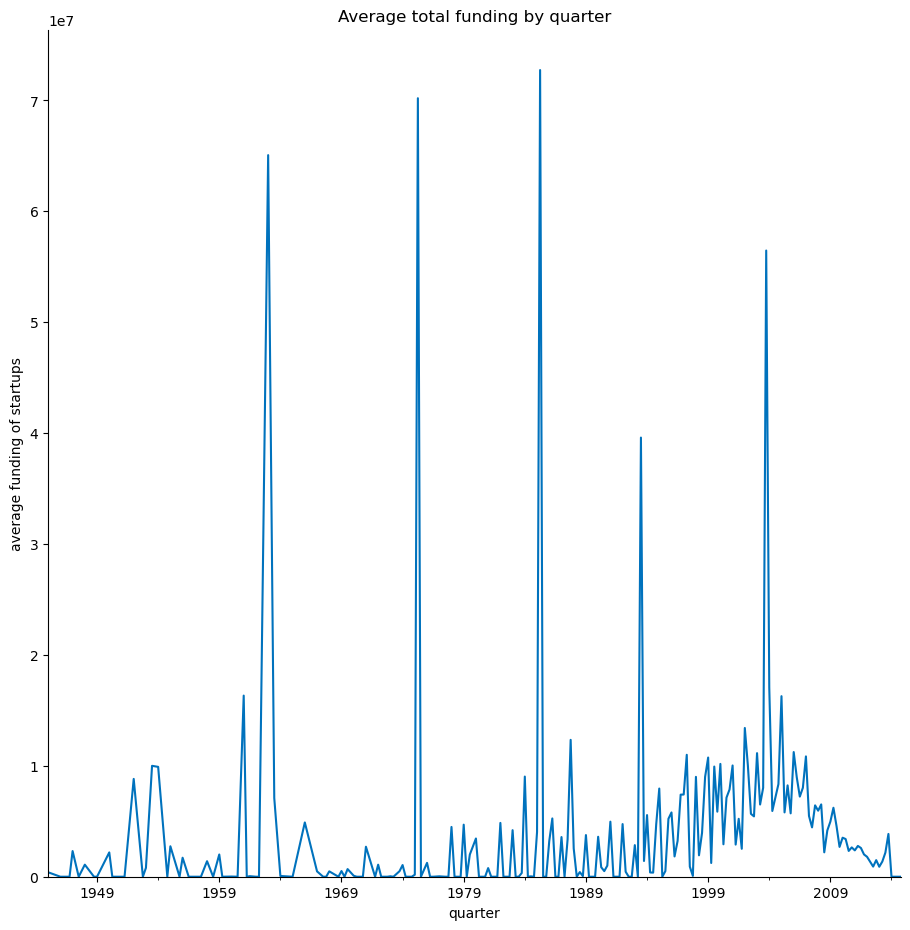

In [88]:
fig, ax = plt.subplots(figsize=(11,11))

ts_NA_SU = NA_SU[NA_SU.quarter > pd.Period("1944Q1")]
ts_NA_SU = ts_NA_SU[["quarter", "funding_total_usd"]]
g_NA_SU = ts_NA_SU.groupby("quarter")
ts_NA_SU = g_NA_SU.mean()
ts_NA_SU.plot(ax = ax, legend = False, color = '#0072BD')

ax.set_ylim(0)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Average total funding by quarter")
ax.set_ylabel("average funding of startups")

Observable from this time series is that the average funding for startups controling for founded period varies a great degree, even with the outliers excluded from the time series. Generally speaking, startups that were created secure far more companies on average after 1944, with their being 6 notable peaks in average funding for startups in this period. There seems to be less periods where average funding of startups are zero as well, indicating that investors in general pointing to the overall increase of wealth for average North Americans. The period between 1999 and 2014 (end of data) seem to be the longest period where the average funding for startups has been consistently high, with the funding peaking around the mid 2000s reaching an average fund of over 50 million dollars. This is interesting as the mid 2000s would have followed the dot come bubble, which should have reduced the expectations many investors had in startups. One possible explanation is that these are the average funding of startups founded at this period, leading to only the most confident founders with financial backing to create a SU. Provided these startups create innovative products/services, it can be assumed that funding can be secured in the future, thus being included in this time series.

Nevertheless, this explanation seems to contradict the commonly held belief that timing and market conditions are the most important factor leading to a startups success. In order for us to control for this, it may be useful to plot this data in a different way, using one of our x variables: real_gdp.

This plot will be using a scatter plot, which will allow us to mark every entry of the dataset (startups founded during and after 2000Q1), making it easier to visualize the distribution of each of these periods. If there are less startups being founded during the same period, then the initial hypothesis that a smaller number of highly successful companies were founded between 1999 and 2009 is true. Because we are using scatterplot, the y variable will be converted into log values. As a result, any startup that did not receive any funding will be excluded from the plot. Although creating a log value column for real_gdp can be useful, it is important to note that these variables can partially act as a time variable, as each quarter is likely to have it's own unique real_gdp value, although recessions and growth can blur the lines between different periods. The numbers are in billions, which controls for the rather high values that would otherwise be present in the dataset already. To preserve some distance between these variables, the real_gdp will remain the same.

In [89]:
#The following code is to ensure that there are no zeroes in our column, as a log of 0 is undefined
NA_SU_ = NA_SU[NA_SU.funding_total_usd != 0]

NA_SU_["log_funding"] = np.log10(NA_SU_.funding_total_usd)

Text(0, 0.5, 'Log-values of startup funding total (USD)')

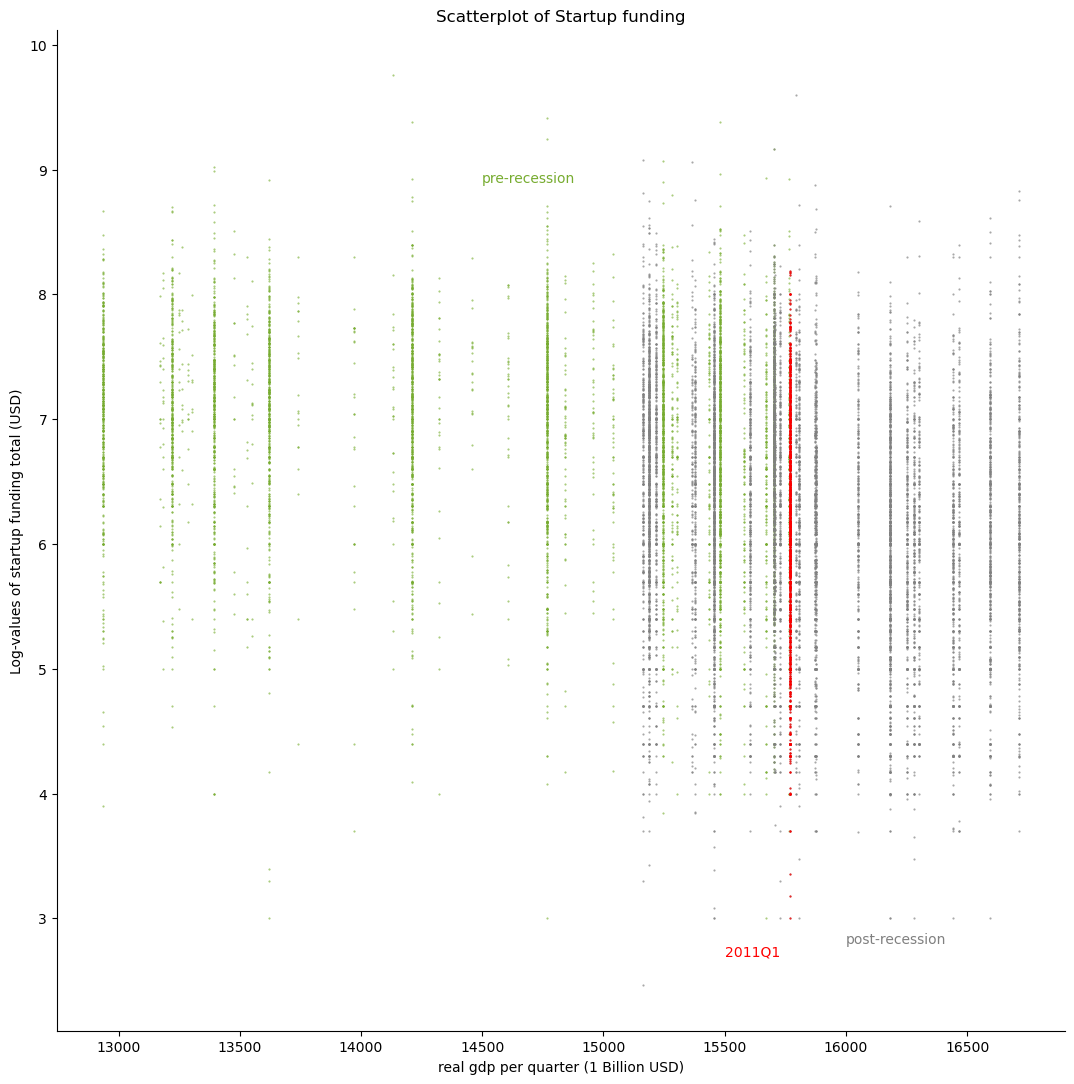

In [90]:
fig, ax = plt.subplots(figsize=(13,13))

not_2011_2008 = NA_SU_[NA_SU_.quarter != pd.Period("2011Q1")]
not_2011_2008 = NA_SU_[NA_SU_.quarter >= pd.Period("2000Q1")]
not_2011_2008 = not_2011_2008[not_2011_2008.quarter <= pd.Period("2008Q1")]
not_2011_2008.plot(kind = "scatter", x = "real_gdp (billion)", y = "log_funding", ax = ax, alpha = 0.7, s= 0.25, color = (0.4660, 0.6740, 0.1880))
ax.text(14500, 8.9, "pre-recession", color = (0.4660, 0.6740, 0.1880))

recession = NA_SU_.loc[NA_SU_["quarter"] >= pd.Period("2008Q1")]
recession.plot(kind = "scatter", x = "real_gdp (billion)", y = "log_funding", ax =ax, alpha = 0.7, s = 0.3, color = "grey")
ax.text(16000, 2.8, "post-recession", color = "grey")

class_2011 = NA_SU_[NA_SU_.quarter == pd.Period("2011Q1")]
class_2011.plot(kind = "scatter", x = "real_gdp (billion)", y = "log_funding", ax = ax, alpha = 0.8, s= 0.3, color = "red")
ax.text(15500, 2.7, "2011Q1", color = "red")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Scatterplot of Startup funding")
ax.set_xlabel("real gdp per quarter (1 Billion USD)")
ax.set_ylabel("Log-values of startup funding total (USD)")

This contradicts the stated hypothesis, as clearly there are an even greater number of startups around the time near the recession and after recession. Much of the data point is clustered around the end of the pre-recession point and after post-recession points. The 2011Q1 cohort (marked in red), which is the most common entry period for startups, is clustered around the same time frame when the average funding of startups was beginning to decline. It is possible that this is the consequence of lagged SU enthusiasm at this time, with some entrepreneurs attempting to replicate the successes of other startups. It is reasonable to believe that the effect of market entry, at least with securing funding, has less impact than is publicly believed.

# Project Two

In [91]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

## The Message

The main goal of this project is to determine which factors are most important in predicting the success of a startup in North America. The first part of the project was primarily interested in cleaning the data as well as finding any existing relation between different variables. In the first project, focused on the importance of separating established startups from the population of interest (modern startups), the relation between quarter and average funding in USD, and the way business cycles impact funding.  One important conclusion of the previous project was that market entry, at least with the information in our dataset, did not seem to have a strong relation to a successful startup.

For the second part of this project, this paper will attempt to work in a completely new direction. If the first project was primarily interested in the 'temporal' relations that exist in the dataset, project two is entirely focused on the 'spatial' relations; which is arguably the most important factor when it comes to modern startups. It is reasonable to assume that urban areas will have a larger talent pool, resources, capital, networking potential, tax incentives, and other vital determinants to a startups' success than rural areas. We may observe the formation of clusters in certain regions, such as Silicon valley, Boston-Cambridge, Wall street, Dulles Technology corridor, and many others that exist in America. The message that this project will attempt to pursue will be the vast importance that location plays in a startups success.

As project two will be working mostly with geographic data, one of the X-variables that can be better understood with a map could be clusters, as actual coordinates or addresses are not useful for observers as it is unlikely they would know or memorize the exact geographic positioning of each of the startups offices in relation to each other. However, there are other ways we can plot other variable of interest in this dataset. One aspect that could be of interest is to group startups by their age and view which clusters of startups are established and which are newer. This can be useful in our understanding of economic development in the region, as it can be assumed that newer startups are brought on by State sponsored efforts to improve the economy of a specific region. Segregating the startups based on their establishedness can help us in the future as well, as the older startups still in operation are unlikely to help us understand the behavior of newer startups in our present economic conditions, however are too important to be dropped in its entirety. 

However, because of the technical skills that are needed to work with clustering algorithms, instead we can get a sense of where the most important regions on the continent is by creating a continental map and then 'zooming' in to the key regions are. To do this, first a map of the entire region will be necessary, then it is necessary to group by category_code, and then the various addresses of SU offices must be compiled.

In addition to cleaning, for the purposes of Project, "other" category startups will count towards "UNLISTED" in order to simplify our category_codes and in the hopes to reduce any potential biases that could come from non-reporting.

In [92]:
NA_offices = pd.merge(NA_SU, office_location, how = "left", on = ['object_id', "country_code"])
NA_offices.drop(axis = 1, columns = "state_code")

# Now create a coordinate column
NA_offices["Coordinate"] = list(zip(NA_offices.longitude, NA_offices.latitude))
NA_offices["Coordinate"] = NA_offices["Coordinate"].apply(Point)
NA_offices = gpd.GeoDataFrame(NA_offices, geometry="Coordinate")

NA_offices["category_code"].replace(to_replace = ("other" "UNLISTED"), inplace = True)


office_exercise = NA_offices.dropna(subset = {'latitude', 'longitude'}, inplace = False)

In [93]:
office_exercise

,object_id,name,category_code,status,funding_total_usd,total_acquired_price,quarter,real_gdp (billion),country_code,valuation,unicorn_dum,established_dum,num_miles,brain_power,network_size,founded_year,latitude,longitude,state_code,Coordinate
0,c:17850,Search Antigua,search,operating,0,0.0,2007Q4,15767.146,ATG,0.0,0,0,0.0,0.0,0.0,2010,17.122966,-61.842615,NaN,POINT (-61.84262 17.12297)
1,c:211476,Red Tail Solutions,software,operating,0,0.0,2013Q2,16464.402,ATG,0.0,0,0,0.0,72.3,1.0,2010,42.271807,-71.618310,MA,POINT (-71.61831 42.27181)
2,c:29720,M2 Global,enterprise,operating,0,0.0,1987Q1,8375.274,ATG,0.0,0,0,0.0,0.0,0.0,1990,17.123817,-61.835561,NaN,POINT (-61.83556 17.12382)
3,c:149134,Bahamaslocal.com,search,operating,1200000,0.0,2009Q2,15161.772,BHS,1200000.0,0,0,1.0,0.0,0.0,2010,0.000000,0.000000,NaN,POINT (0.00000 0.00000)
4,c:280902,DreamChrono,ecommerce,operating,0,0.0,2013Q4,16712.760,BHS,0.0,0,0,0.0,0.0,0.0,2010,0.000000,0.000000,NaN,POINT (0.00000 0.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67977,f:9991,Recruit Strategic Partners,UNLISTED,operating,0,0.0,1960Q1,3277.847,USA,0.0,0,0,0.0,0.0,0.0,1960,37.787249,-122.399050,CA,POINT (-122.39905 37.78725)
67978,f:9997,Axel Johnson,UNLISTED,operating,0,0.0,1920Q1,NaN,USA,0.0,0,0,0.0,0.0,0.0,1920,40.724468,-74.001704,NY,POINT (-74.00170 40.72447)
67979,f:9998,Liberty City Ventures,UNLISTED,operating,0,0.0,2012Q3,16282.151,USA,0.0,0,0,0.0,0.0,0.0,2010,40.714353,-74.005973,NY,POINT (-74.00597 40.71435)
67980,f:9999,CalSTRS,UNLISTED,operating,0,0.0,1913Q3,NaN,USA,0.0,0,0,0.0,72.7,1.0,1910,38.585713,-121.509262,CA,POINT (-121.50926 38.58571)


In [94]:
NA_offices.dropna(subset = {'latitude'}, inplace = True)
g_NA_offices = NA_offices.groupby("category_code")
category = g_NA_offices.nunique()
category.sort_values("object_id", ascending = False, inplace = True)
category.head(5)

,object_id,name,status,funding_total_usd,total_acquired_price,quarter,real_gdp (billion),country_code,valuation,unicorn_dum,established_dum,num_miles,brain_power,network_size,founded_year,latitude,longitude,state_code,Coordinate
category_code,,,,,,,,,,,,,,,,,,,
UNLISTED,9117,9116,4,321,144,198,148,12,324,1,1,28,1891,79,12,2908,2909,51,2915
software,8759,8759,4,1415,318,160,157,11,1424,2,2,30,1570,54,9,2726,2726,51,2728
web,6128,6128,4,650,186,128,116,12,653,2,2,22,1138,41,11,2209,2203,49,2212
other,4673,4673,4,224,106,205,171,10,233,2,1,19,466,30,12,1456,1455,51,1456
biotech,3167,3167,4,1619,214,107,99,3,1629,2,1,14,867,39,12,826,825,50,826


The table above shows the top 5 most common startups in North America. The 'cluster' maps in the following sections will therefore be visualizing these specific industries 

## Merged with BEA dataset

For this project, the main objective is to prove that with the main x variables given, we can determine how successful a SU in North America will be. With additional cleaning, we will remove the most established startups from the list in order to prevent the data from becoming skewed. Because one of the main x variables (distance from hotbed), the GPS coordinates must be used, therefore many of the maps will be related to the industry clusters. However, it is reasonable to assume that clusters themselves do not appear randomly, as they are often directly and/or indirectly formed by differences in development, government policy, demographics, availability of skilled workers, and many other factors. 

For example, although the GDP per quarter data provided by the FRED dataset aggregates the sum total of the US GDP and will not be interesting to map, but the BEA dataset can provide us some information about the performance of specific counties in the US in a given time. The following map shows that these clusters largely form in areas that have a higher GDP. 

In [95]:
county_gdp = pd.read_csv(r"CAGDP1__ALL_AREAS_2001_2021.csv")
# Using Regex, we will attempt to remove only use the data that's a county
clean_county_gdp = county_gdp[county_gdp.GeoName.str.match(".*(?<!Area),\s.*")]
clean_county_gdp = clean_county_gdp[clean_county_gdp.Description == "Real GDP (thousands of chained 2012 dollars) "]
clean_county_gdp = clean_county_gdp[["GeoFIPS", "GeoName", "2014"]]

county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df.rename(columns = {"GEOID": "GeoFIPS"}, inplace = True)
county_df = county_df[["GeoFIPS", "geometry"]]

In [96]:
clean_county_gdp.dropna(subset = {"2014"}, inplace = True)
clean_county_gdp = clean_county_gdp[clean_county_gdp["2014"] != "(NA)"]

In [97]:
# Calculating the mean
result = 0
count = 0
for num in clean_county_gdp["2014"]:
    result += float(num)
    count += 1
result = result / count
result

5403827.784402192

In [98]:
clean_county_gdp["2014"] = pd.to_numeric(clean_county_gdp["2014"], errors = "coerce")
clean_county_gdp_ = clean_county_gdp[clean_county_gdp["2014"] >= 5403827.784402192] # This is the average of the county_GDP calculated in the cell above

For some reason, GeoFIPS is in quotation marks. The next part will need to clean this for both datasets

In [99]:
clean_county_gdp["GeoFIPS"] = clean_county_gdp["GeoFIPS"].str.replace('"', "")
clean_county_gdp["GeoFIPS"] = clean_county_gdp["GeoFIPS"].str.strip()

clean_county_gdp_["GeoFIPS"] = clean_county_gdp_["GeoFIPS"].str.replace('"', "")
clean_county_gdp_["GeoFIPS"] = clean_county_gdp_["GeoFIPS"].str.strip()

In [101]:
wealth_map = pd.merge(county_df, clean_county_gdp_, on = "GeoFIPS")

In [102]:
American_SU = NA_SU[NA_SU.country_code == "USA"]

In [103]:
American_SU_map = pd.merge(American_SU, office_location, how = "left", on = 'object_id')
American_SU_map.dropna(subset = {'latitude'}, inplace = True)

American_SU_map["Coordinate"] = list(zip(American_SU_map.longitude, American_SU_map.latitude))
American_SU_map["Coordinate"] = American_SU_map["Coordinate"].apply(Point)
American_SU_map = gpd.GeoDataFrame(American_SU_map, geometry="Coordinate")

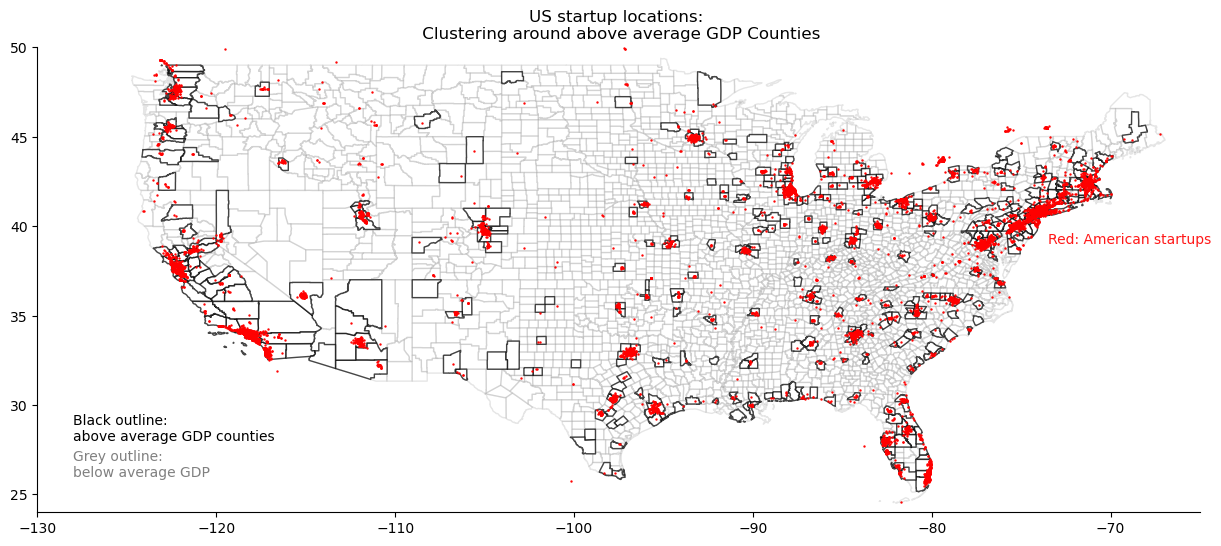

In [104]:
# Plotting
fig, gax = plt.subplots(figsize=(15,15))
# plot the counties
county_df.plot(ax=gax, edgecolor='grey', color = 'white', alpha = 0.2)

wealth_map.plot(ax=gax, edgecolor='black', color = 'white', alpha = 0.7)
American_SU_map.plot(ax=gax, color = "red", alpha = None, markersize = 0.5)
gax.text(-73.5, 39, "Red: American startups", color = "Red", alpha = 0.9)

gax.set_xlim(-130, -65)
gax.set_ylim(24, 50)

gax.set_title("US startup locations: \n Clustering around above average GDP Counties")
gax.text(-128, 28, "Black outline: \nabove average GDP counties", color = "black", alpha = 1)
gax.text(-128, 26, "Grey outline: \nbelow average GDP", color = "grey", alpha = 1)

gax.spines["right"].set_visible(False)
gax.spines["top"].set_visible(False)

As can clearly be seen in this data, it can clearly be observed that SU hotbeds and real GDP in region are highly correlated. Much of the startups in the US, as it will likely be in other countries, are overwhelmingly located around the wealthier counties of the nation. Some of the noteworthy regions that can be analyzed are the North West region, the Midwest around Chicago and Detroit, Florida, Texas, and the American West region. 

As mentioned previously, the distance of a SU from an industry specific cluster will largely determine their success. This is because we can assume that a SU cluster already centered around the wealthiest sections of society. In other words, the X variables (clusters and real GDP) are in a sense highly correlated.

We can take this argument further and actually plot the BEA dataset using a colormap and plot it against the Y variable to see if the startups receiving the highest amount of funding are located in the richest parts of the US.

In [105]:
g_top = American_SU_map.sort_values("funding_total_usd", ascending = False)
top1000 = g_top.head(1000)

In [106]:
high_wealth_map = pd.merge(county_df, clean_county_gdp, on = "GeoFIPS")
high_wealth_map.sort_values("2014", ascending = False, inplace = True)
high_wealth_map = high_wealth_map.head(100)

The wealthiest county (LA, CA) and the 100th wealthiest county (Polk, IA) in the US have a 2014 GDP of 604,034,122 and 34,748,138 dollars respectively. Though the differences between these two counties are still quite large, because they are close enough to be perceived using a color map, we will be using these two values the minimum and maximum values for the color map. With this information, we can create a wealth map of the US and compare these values to the 500 most funded startups in America.

(-125.0, -67.0, 25.0, 51.0)

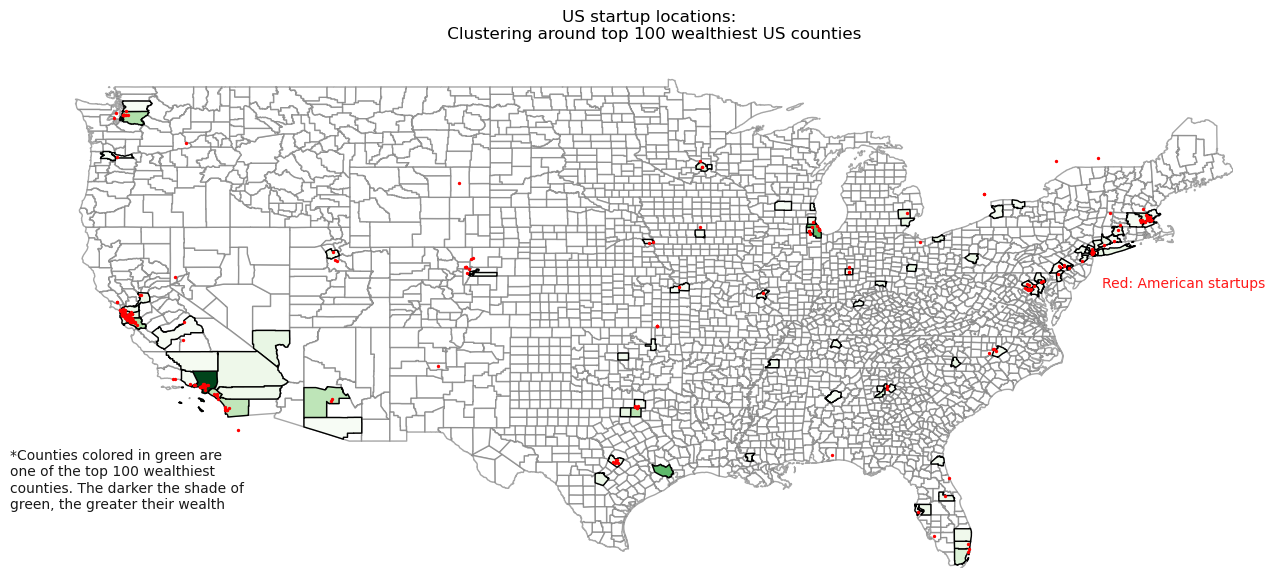

In [107]:
fig, gax = plt.subplots(figsize=(15,15))
fig.tight_layout
county_df.plot(ax=gax, edgecolor='grey', color = 'white', alpha = 0.7)
high_wealth_map.plot(
    ax=gax, edgecolor='black', column='2014', legend=False, cmap='Greens',
    vmin=34748138, vmax=604034122)
top1000.plot(ax=gax, color = "red", alpha = None, markersize = 2)
gax.text(-73.5, 39, "Red: American startups", color = "Red", alpha = 0.9)

gax.set_xlim(-125, -67)
gax.set_ylim(25, 51)

gax.set_title("US startup locations: \n Clustering around top 100 wealthiest US counties")
gax.text(-128, 28, "*Counties colored in green are\none of the top 100 wealthiest\ncounties. The darker the shade of\ngreen, the greater their wealth", color = "black", alpha = 0.9)

gax.axis("off")

The top 100 wealthiest counties (Which have a dark black outline) will have a higher GDP the darker the shade of green it is. Even though some of the counties look grey, any county with a dark black edge is still far wealthier than the counties that are not. 

From this data, it is quite apparent that most of the top 1000 most well funded startups in this dataset are almost entirely based around the top 100 wealthiest counties in America. In essence, though the x-variable for clusters may seem trivial, there is a lot of crucial information that is hidden into these maps. This information is so correlated that in fact it may be difficult to run a regression test using clusters as a x variable as it is highly correlated with other x-variables as well as the main y-variable as well. Despite this, it is important to note once again that mapping this information can give us a better sense of economic performance in the country.

# Maps and interpretation

Many of the maps that will come in this section to my surprise look almost indistinguishable to each other. Prior to this project, I truly believed that there existed 'special zones' for many of these startups and we would be able to see a disporportianate amount of startups of one type cluster in specific regions in the US. Although this information is perhaps anecdotal for an academic project, my own intership had to do with researching news reports about the Biotech sector in the US and I was under the impression that Biotech was such a specialized sector that only a select few cities in the US had a booming sector that was leading the world in this. However, at least with the maps produced, this view seems to have been highly exaggerated. For future developments, I will investigate my own work further to see if there are ways to perhaps visualize this more effectively (Since there are too many dots in major cities, it is quite possible that the viewer just perceives all of these clusters as one shapeless blob after another).

With that aside, much of the data is still very interesting as we can see the presence of a select group of industries in each North American city, as well as view the greater number of SU entry that occurred in NA. To begin this section, we will begin by creating a general plot of all the NA startups on the continent. 

In [108]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
NA_shape = world[world.continent == "North America"]

In [110]:
g_oe = office_exercise.groupby("country_code")

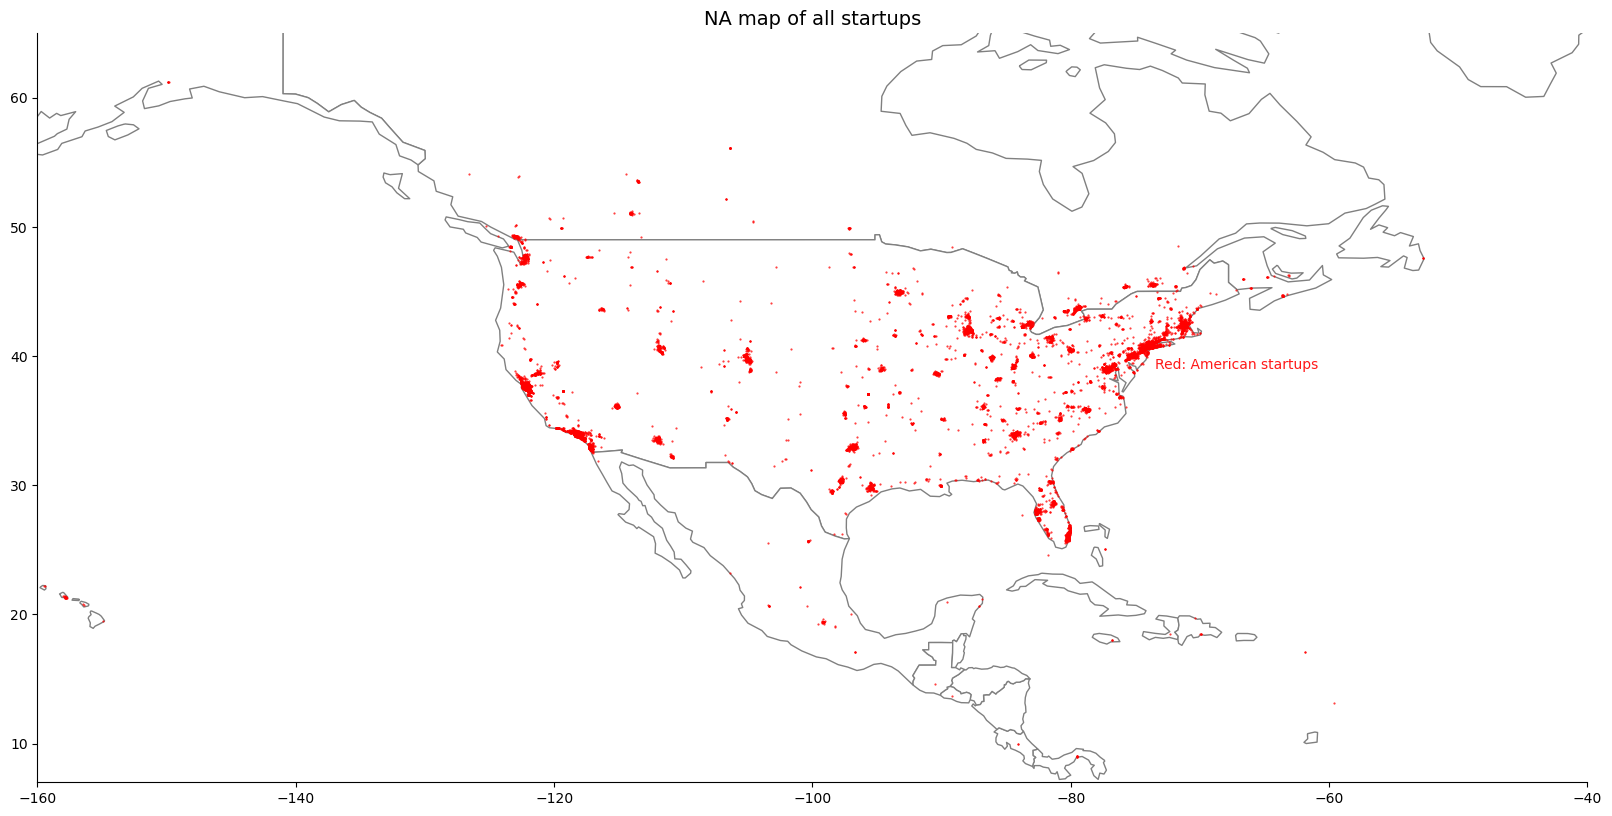

In [111]:
# Plotting
fig, gax = plt.subplots(figsize=(20,20))
# plot the region
NA_shape.plot(ax=gax, edgecolor='grey', color = 'white')
# gax.text(-110, 28, "Counties producing \n below average GDP", color = "grey", alpha = 1)

office_exercise.plot(ax=gax, color = 'red', markersize = 0.3, alpha = 0.8)
# gax.text(-75, 36, "Counties producing \n above average GDP", color = "black", alpha = 1)
# gax.text(-73.5, 39.5, "American SUs", color = "Red", alpha = 0.9)

gax.set_xlim(-160, -40)
gax.set_ylim(7, 65)

gax.set_title("NA map of all startups", fontsize = 14)
gax.text(-73.5, 39, "Red: American startups", color = "Red", alpha = 0.9)
gax.spines["right"].set_visible(False)
gax.spines["top"].set_visible(False)

The vast majority of startups, as observed from this simple map, can be seen to exist in both the US and Canada. From this dataset, it is unclear exactly what the definition of a startup is (for example, Rockefeller University is counted as a SU), however if it strictly is any private business it is hard to believe that there are only a handful of businesses in the entirety of the Carribean. In the case of Cuba for example, this is understandable as the island is a socialist republic that has faced strict economic sanctions, leading to potential entrepreneurs in the nation having little capital as well as having a government that discourages private businesses.

Without the definition of course, it is not entirely clear how this data was collected. It maybe that publicly available data for some of these countries were not available to be viewed, and as a result are excluded in its entirety from these datasets. Despite these potential issues, it is not unreasonable assume that the US and Canada are in fact very well represented on the continent, especially as the US in 2014 was and still is the most powerful economic power of the world.

In the following maps below, there will be specific regions that will not be included in some of the sub graphs. These regions don't have many startups based in them and skew the maps in a way they can be argued to be 'outliers', however in order to avoid making this project too US-centric, a separate map seemed to be in order with all of the startups that include every one of these industries. To simplify the number of calculations, we will create a separate dataframe including only those industries that we are interested in grouping together.

For visibility, we will be viewing the continent from it's eastern hemisphere to the western hemisphere.

In [112]:
SU_industry = [(0, 0, "UNLISTED", "tab:blue"), 
               (0, 1, "software", "tab:orange"), 
               (0, 2, "web", "tab:green"), 
               (1, 0, "biotech", "tab:red"), 
               (1, 1, "ecommerce", "tab:purple")]

slide = []
for (i, x, industry, c) in SU_industry:
    slide.append(g_NA_offices.get_group(industry))

specified_SU = pd.concat(slide, axis=0)

(-110.0, -59.0, 5.0, 27.0)

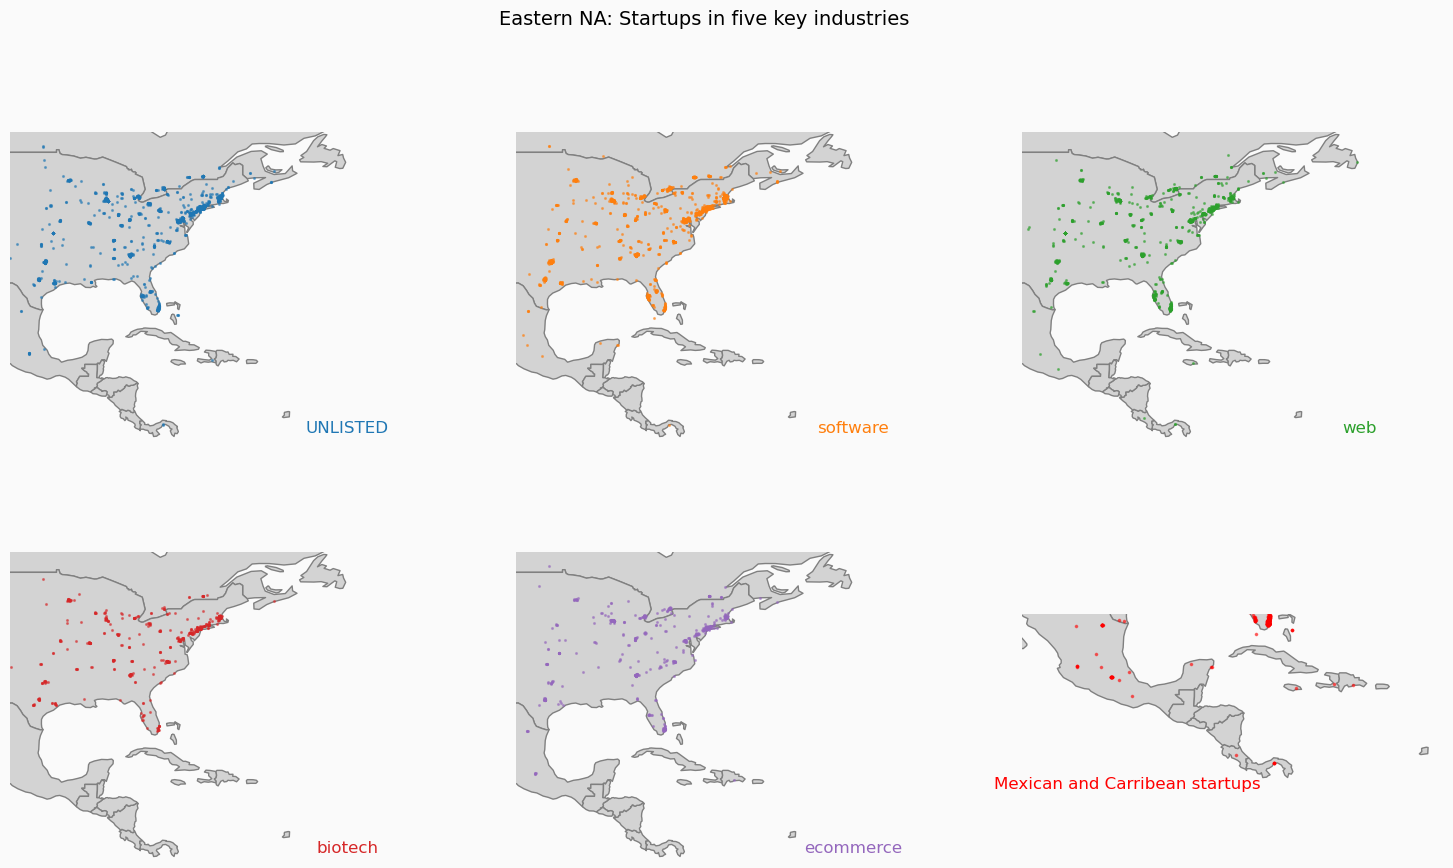

In [113]:
SU_industry = [(0, 0, "UNLISTED", "tab:blue"), (0, 1, "software", "tab:orange"), (0, 2, "web", "tab:green"), (1, 0, "biotech", "tab:red"), (1, 1, "ecommerce", "tab:purple")]
g_NA_offices = NA_offices.groupby("category_code")

def get_group_plot(df, industry, axis, marker_size, alp, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    _df = df.get_group(industry)
    _df.plot(
        ax=axis, markersize = marker_size, alpha = alp, color=color
    )
    return ax

fig, gax = plt.subplots(2, 3, figsize=(20, 20))
fig.tight_layout
fig.set_size_inches(18.5, 10)
color = (0.1, 0.2, 0.5, 0.3)
bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
fig.suptitle("Eastern NA: Startups in five key industries", fontsize= 14)

for (i, x, industry, color) in SU_industry:
    NA_shape.plot(ax = gax[i][x], edgecolor='grey', color = '#D3D3D3')
    get_group_plot(g_NA_offices, industry, gax[i][x], 1.5, 0.5, color = color)
    gax[i][x].set_title(industry, color = color, x = 0.8, y = -0.01)
    gax[i][x].set_xlim(-102, -40)
    gax[i][x].set_ylim(7, 52)
    gax[i][x].axis('off')
gax[1][2].axis('off')

# Just Carribean + parts of Mexico
NA_shape.plot(ax = gax[1][2], edgecolor='grey', color = '#D3D3D3')
specified_SU.plot(ax = gax[1][2], color = "red", markersize = 2.5, alpha = 0.5)
gax[1][2].set_xlim(-110, -59)
gax[1][2].set_ylim(5, 27)
gax[1][2].set_title("Mexican and Carribean startups", x = 0.25, y = -.01, color = 'red')
gax[1][2].axis("off")


The Eastern half of the US seems to enjoy a wider variety of startup success, as many of the maps look virtually identitcal to each other. Unsurprisingly, many of the higher than average GDP county's seem well represented in these clusters as they are largely located in the same regions as the BEA plot.

For the western half, we will not include Hawaii in many of these submaps as it skews the data as well as not having many startups, however we will include the sum total of all the startups in Hawaii independently.

(-161.0, -155.0, 19.0, 23.0)

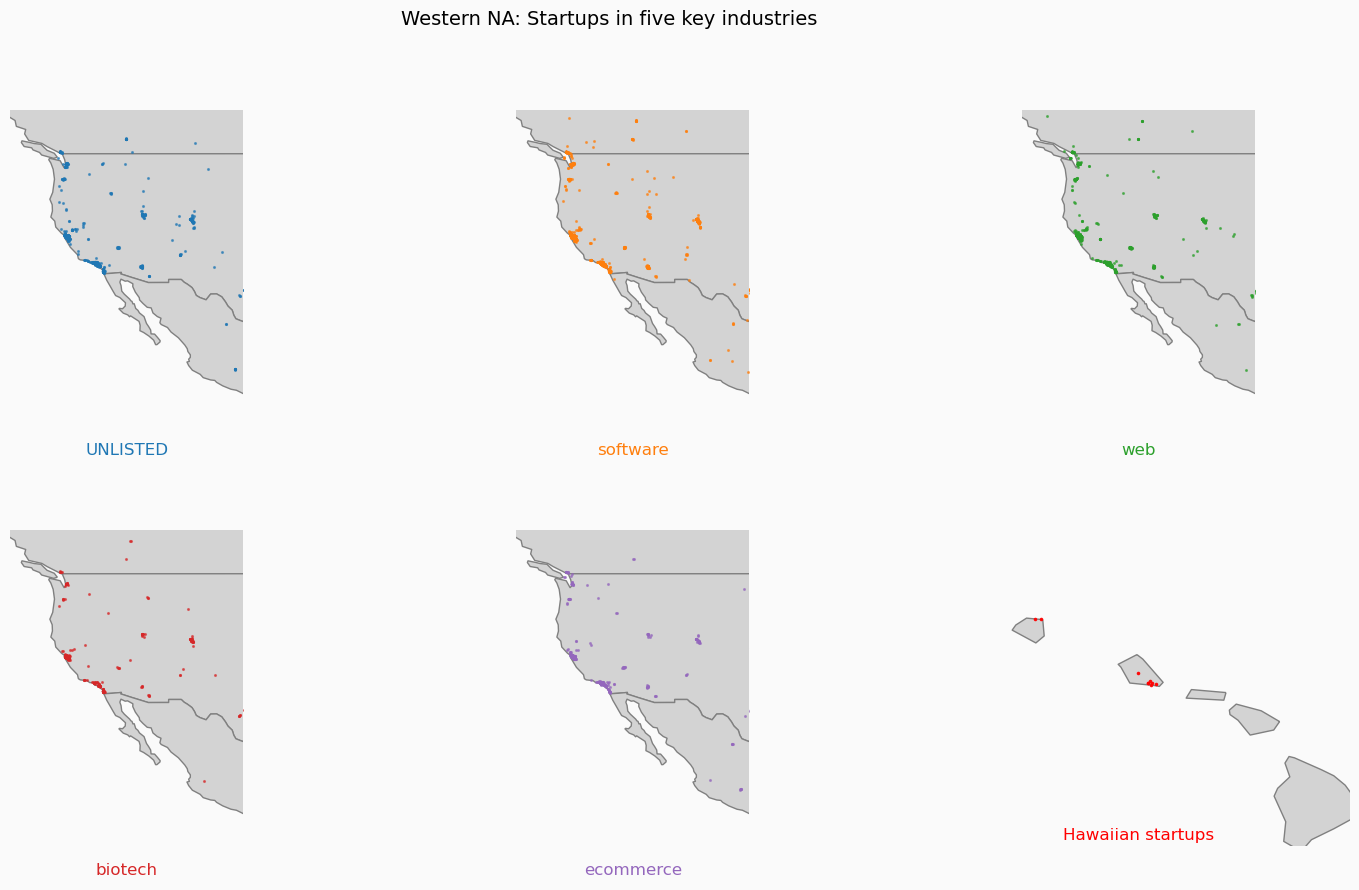

In [114]:
# Create initial plot
fig, gax = plt.subplots(2, 3, figsize=(20, 20))
fig.tight_layout
fig.set_size_inches(18.5, 10)
color = (0.1, 0.2, 0.5, 0.3)
bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
fig.suptitle("Western NA: Startups in five key industries", fontsize= 14)

for (i, x, industry, color) in SU_industry:
    NA_shape.plot(ax = gax[i][x], edgecolor='grey', color = '#D3D3D3')
    get_group_plot(g_NA_offices, industry, gax[i][x], 1.5, 0.6, color = color)
    gax[i][x].set_title(industry, color = color, y = -0.01)
    gax[i][x].set_xlim(-130, -98)
    gax[i][x].set_ylim(7, 55)
    gax[i][x].axis('off')

# Just Hawaii
NA_shape.plot(ax = gax[1][2], edgecolor='grey', color = '#D3D3D3')
specified_SU.plot(ax = gax[1][2], color = "red", markersize = 2.5, alpha = 0.9)
gax[1][2].set_xlim(-161, -155)
gax[1][2].set_ylim(19, 23)
gax[1][2].set_title("Hawaiian startups", y = -.01, color = 'red')
gax[1][2].axis("off")

Originally when starting this project, one of the variable of interest was the distance (km) from identified clusters that a startup would be from it's respective industry cluster. However, attempts to average GPS coordinates would quickly become nonsensical, and it became quickly apparent that using clustering algorithms like DBSCAN without knowing the theory or the technical terminology was unrealistic. Furthermore, viewing the map in this form makes it clear that there are no 'special' clusters for any specific industry. Generally speaking, there is far too much overlap between the locations of these four key industries (as well as the general UNLISTED category), that any analysis of a startup and its distance from a cluster will virtually be equivalent to analyzing the distance between an startup and the nearest urban setting. In short, if a region such as Boston/Cambridge is known as a biotech hotspot, they will also likely be a hotspot for virtually any type of startup.

The next variable of interest will be to plot the ages of a startup, by plotting a different color for each decade. This can allow us to view the development of startups over time. However, because 1990, 2000 and 2010 alone account for over 95% of the total number of startups in NA, and a plot of this map looks nearly identitcal to the first map in this section, we will be excluding these data. If the reader would like to compare the differences between the plot of the older startups compared to the newer ones, a comparison with the first map should suffice. However for this plot, we will mostly focus on 1900 - 1980 era, as it is in 1980 we notice a boom

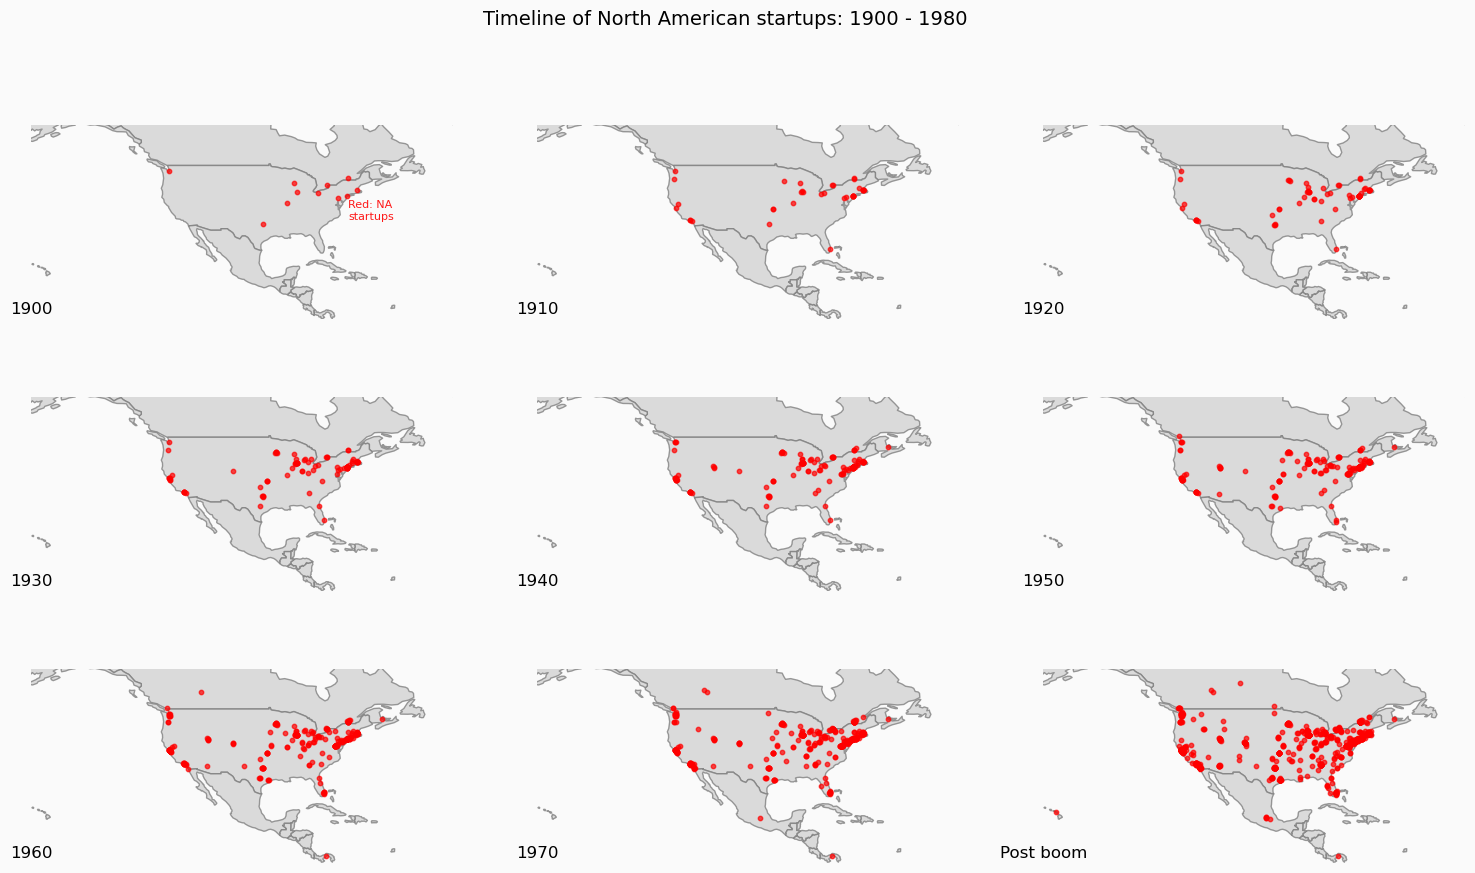

In [115]:
NA_offices_ = NA_offices[NA_offices.founded_year <= 1990]
g_NA_offices_ = NA_offices_.groupby("founded_year")

fig, gax = plt.subplots(3, 3, figsize=(20, 20))
fig.tight_layout
fig.set_size_inches(18.5, 10)
color = (0.1, 0.2, 0.5, 0.3)
bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
fig.suptitle("Timeline of North American startups: 1900 - 1980", fontsize= 14)


NA_offices_ = NA_offices[NA_offices.founded_year <= 1980]

def time_series_map(df, axis, group):
    _df = df[df.founded_year <= group]
    _df.plot(
        ax=axis, markersize = 10, color = "red", alpha = 0.7
    )
    return ax


ts_map = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
for i in range(len(years[: len(years) - 3])):
    ts_map[i] += (years[i],)


for i, x, group in ts_map:
    NA_shape.plot(ax = gax[i][x], edgecolor='grey', color = '#D3D3D3', alpha = 0.8)
    time_series_map(NA_offices_, gax[i][x], group)
    if group == 1900:
        gax[i][x].text(-73.5, 34.5, "Red: NA\nstartups", color = "Red", alpha = 0.9, fontsize = 8)
    if group != 1980:
        gax[i][x].set_title(group, x = 0, y = -0.01)
    else:
        gax[i][x].set_title("Post boom", x = 0, y = -0.01)
    gax[i][x].set_xlim(-160, -45)
    gax[i][x].set_ylim(7, 60)
    gax[i][x].axis('off')

From this 'time series' map plot, we can clearly see the rapid startup expansion that begins in the second half of the 20th century. The last three periods, the maps look almost identitical to the earlier maps. We can also see clearly see that the country that sees the greatest startup boom in these periods are clearly the US. As mentioned earlier, the Eastern half of the US seems to have been the established region for many of the established and newer startups. This is unsurprising, as New York for example has always been the financial center of the US, being more established in this sense than the rapid expansion of Californian businesses.

In terms of Canada, there is a comparable number of startups in 1900, however they don't see nearly as much success as the US. Although Canada has the second most number of startups in the continent, there is a great gap that can be visually be seen when plotted on a map. In fact, some of the most successful regions in Canada also happen to be close to the US-Canada border, as there is likely greater opportunity the closer cities are to the more established regions to their southern neighbor. It is also interesting to note that according to this dataset, the first startups in Mexico begin emerging in the 70s, which begin to rapidly expand in the 80's startup boom. 

# Project Three

In [116]:
import requests
from bs4 import BeautifulSoup
import regex as re

## Potential Data to scrape

There are many potential datasets that can be merged with the current dataset to further explore exactly what factors are most important in determining a startups success. With web scraping, it may be possible to concat more updated information about each of the determinants listed in the previous projects (i.e. updating the list of North American startups post-2014, scraping websites/social media to update the number of milestones for existing/new startups, scraping business journal's to see update startup acqusition data, etc). However, there are new determinants and proxies that could help us understand a succecssful startup. With the possibility of web scraping, new determinants and variables that we can include in our dataset can include asset valuation, GPS locations of universities, and public perception data. 

To be considered a Unicorn startup (a concept that is hinted at the title of my project), a startup must have assets valuing over $1 billion USD. This is the most accurate piece of data that is completely missing from the Kaggle dataset, which was proxied by the total funding USD variable in the earlier versions of this project. However, total funding by investors and government agencies are not the sole way that a company can rapidly increase it's value, as it does not include any information about the revenue of the company. With data scraping, this project can have a better Y-variable (total funding being reduced to another x-variable), and this project will actually be able to understand the trends that increase the chances of creating unicorns. We can scrape this data from websites like Yahoo! Finance, and try to create a dataframe with the relevant information.

With webscraping techniques, we can collect the ranking and GPS location of every university in North America, which can be used to approximate the distance between a startup's headquarters from the nearest univeristies. This can add to the clustering information, as many R&D centers in America are likely based near university clusters. This means that being closer to urban cities with a concentration of world class academics is likely to improve the availability a startup has for acquiring high skilled workers such as researchers, data analysts, engineers, etc. We can calculate the distance a startup is from a university, and see if that leads to a greater level of innovation. This data can be pulled from QS Top University and other data sources, although there are not many databases that list the exact GPS location of each of these universities.

Other data that can be potentially scraped could be the social media presence and/or the public perception of these startups. It is reasonable to assume that the more successful a startup is, the greater their funding for advertising, SEO, and marketing would become. If this assumption holds, we can attempt to proxy this by analyzing their social media presence and activity. What can be more effective could be to attempt to scrape public opinion data, which may provide key insights into the successfulness of the company. The clear choice for this kind of scraping project would be to scrape public opinion data from twitter, yelp, and other sites where customer engagement is gathered.

## Potential challenges

Scraping these potential data sources however is a highly ambitious task that would require weeks, if not months of data scraping. There are immediate challenges for some of these datasets, for example Yahoo! Finance only lists companies that are publicly traded or are unicorn startups, and does not provide estimates on the valuation of some of the smaller companies in this list. This could lead to sampling bias in regression testing down the line, as we can not comment on the valuation of the newer (by 2014 standard) startups or the lesser valued companies that would not be listed on Yahoo. Furthermore, because the financial statements of smaller private companies are not legally required to be disclosed to the public, and because there would be less data available for smaller private startups, estimating the value of these companies could be challenging. It is possible however to find enough estimates by scraping multiple websites and comparing similar companies, and could perhaps be explored further in a future research project.

The potential challenges associated with many university related websites is that many universities will not include information about the precise geographic location of each university. This information is likely in each university websites, which may require a web crawler or other tools to access. Because this approach would require a more 'decentralized' approach to scraping, which would likely require further researching and technical skills to accomplish. Furthermore, with websites like QS Top University there are issues with the terms of service that do not allow users to easily access the data using HTML scraping techniques. After some research, QS does seem to have some API, however this would require API tokens (Which I currently do not possess).

Finally, for social media presence and/or the public opinion data would be further challenging to scrape and analyze. Although twitter has an API based data scraping options, with the amount of potentially misleading data that can exist and the difficulty in cleaning such a dataset in a way that can be merged with this project's current data would be difficult to manage. Because all of the following projects seem far too ambitious at this stage of the project, instead this project will focus on scraping simpler datasets that can still provide useful information that can determine the likelihood of success of a startup.

## Scraping data from a website

For this project, a dataset that is scrapable that is a potentially useful determinant for the likelihood of success for a startup is the tax incentives provided by each region for R&D companies. Many industries, such as the biotech sector or technology sector, is deemed to be valuable to the innovative output as well as economic well being of a country. Many wealthier countries in the world will therefore attempt to encourage startups in certain industries to cultivate innovation and technological output. As a result, it can be valuable to understand the general tax incentive programs that are available in each state.

According to EY, North American states which are offering R&D tax incentives programs in 2014 are US and Canada. Although Mexico has since introduced an R&D program in 2017, because this is out of the range that is made available on the Kaggle dataset it does not qualify for analysis. **An interesting direction this project can be taken can be to focus on Mexico and the Carribean, and perhaps use a diff-in-diff analysis to understand the impact the tax incentives program has had on Mexico's startup economy.** However, for this project, we will be scraping tax incentives programs in the US and Canada and see the impact these laws have on their local startup economies.

The R&D Tax credits by US states data was scraped from Alvarez and Marsal website, and Canadian provincial data was scraped from the Government of Canada's website.

In [117]:
US_link = "https://publish.smartsheet.com/df660fc8ecac48e9b354512dc9b837c1"
CA_link = "https://www.canada.ca/en/revenue-agency/services/scientific-research-experimental-development-tax-incentive-program/summary-provincial-territorial-research-development-tax-credits-december-31-2016.html"

In [118]:
US_response = requests.get(US_link)
campbell = BeautifulSoup(US_response.content, "html.parser")

In [119]:
US_datatable = campbell.find_all('tr')[2:]

lst = []
for elm in US_datatable:
    lst.extend(elm.findAll('td'))

In [71]:
US_response.status_code

200

In [120]:
state_code = campbell.find_all("td", class_="cls1136963742599232_0")
tax_credit = campbell.find_all("td", class_="clsCellBorder")

In [121]:
state_code = state_code[1::2]

In [122]:
US_regex = re.compile(r'[\d.\s]+?%')
CA_regex = re.compile(r'[\d?.]+?%')

In [123]:
US_tax_df = pd.DataFrame(columns = ['state_code', "dummy", 'tax_credit'])

state_list = []
for row in state_code:
    state_list.append(row.getText())

US_tax_df["state_code"] = state_list

bool_list = []
tax_list = []
for i in range(len(tax_credit)):
    if tax_credit[i].getText() == "Yes":
        bool_list.append(True)
        tax_str = tax_credit[i + 1].getText()
        tax_list.append(US_regex.findall(tax_str)[0].strip())
    elif tax_credit[i].getText() == "No":
        bool_list.append(False)
        tax_list.append(None)
US_tax_df["dummy"] = bool_list
US_tax_df["tax_credit"] = tax_list

In [124]:
CA_response = requests.get(CA_link)
poutine = BeautifulSoup(CA_response.content, "html.parser")

In [77]:
CA_response.status_code

200

In [125]:
CA_database = poutine.findAll("div", class_="mwsbodytext text parbase section")

In [126]:
CA_tax_df = pd.DataFrame(columns = ['province', 'tax_credit'])

provinces = []
tax_credit = []

for row in CA_database[1:]:
    if row.find("h2"):
        check = row.getText().strip()
        if "Quebec" in check:
            pass            
        else:    
            provinces.append(row.getText().strip())

for row in CA_database[1:]:
    if row.find("p"):
        check = row.getText().strip()
        value = CA_regex.findall(check)
        if value != []:
            tax_credit.append(value[0])

provinces.remove("Ontario")
CA_tax_df['province'] = provinces
CA_tax_df['tax_credit'] = tax_credit

Quebec's SR&ED program is not listed on the Government of Canada website, and all attempts to scrape this data has proven difficult. The Provincial Government of Quebec website does not list the tax credit rate. The only source which lists Quebec's tax credit rate is on the SR&ED website, however the site blocks the 'inspect element' feature (It even does not allow copy and pasting). Therefore, since this is the only province which has these restrictions, it seemed necessary to manually add the 14% tax credit that is offered by the Quebecois government.

In [127]:
CA_tax_df.loc[len(CA_tax_df.index)] = ["Quebec", "14%"]

In [128]:
CA_tax_df

,province,tax_credit
0,Newfoundland and Labrador,15%
1,Nova Scotia,15%
2,New Brunswick,15%
3,Ontario,10%
4,Ontario,20%
5,Ontario,4.5%
6,Manitoba,15%
7,Saskatchewan,10%
8,Alberta,20%
9,British Columbia,10%


In addition, in the current state, the scraped data lists three different tax credit programs for Ontario. However, on the Government of Canada website, the Ontario Innovation Tax Credit programs passed in 2008 gave startups a refundable rate of 10% before 2016. This means that 10% is in fact the correct rate for all startups founded in 2014. Therefore, this will be the tax credit listed for Ontario.

In [129]:
CA_tax_df.drop([4,5], inplace = True)
CA_tax_df = CA_tax_df.reset_index(drop = True)

## Merge the Scraped Dataset/adding a new dataset

For this section, we need to find a way to merge the scraped tax credit dataset to the existing startup dataset. Although the American startups have clearly denoted state codes that can be matched to the scraped dataset, the Canadian dataset only lists cities and regions. This is an immediate challenge, as many of these observations will list only cities or regions without their associated provincial name, which means there will be merging issues with the scraped dataset, which only includes provincial name. To avoid this, a new dataset will be imported that can merge with the existing dataset to give an accurate provincial category, allowing it to be merged successfully. On simplemaps.com there was a free dataset that contained a list of Canadian cities with a population over 1000. There is a slight assumption in using this dataset, as it assumes that every startup in Canada are located in bigger urban centers. However with the results of Project two, this assumption will probably lead to the highest level of matching for a publicly available dataset.

The following code will also be using the rapidfuzz library to merge some of the city names in the existing dataset to the cities in the imported dataset. Without this, almost 1000 observations would have subtle spelling errors that this program will not know how to interpret, and would be forced to be dropped. Once this merging process is done, every Canadian observation will have a new 'state' code, which will list the province 

Finally, the scraped dataset will be able to be merged.

In [130]:
regex = re.compile("[\w]+")

In [131]:
CA_city = pd.read_csv("canadacities.csv")
CA_city = CA_city[["city", "city_ascii", "province_name"]]

HQ_location = pd.read_csv("offices.csv")
HQ_location = HQ_location[["object_id", "region", "city", "country_code", "state_code"]]

# Canadian HQ
g_HQ = HQ_location.groupby("country_code")
CA_HQ = g_HQ.get_group("CAN")

CA_HQ = CA_HQ.dropna(subset = {'city'})

new = list(CA_HQ.city.str.findall("[\w\s]+"))
result = []
for i in range(len(new)):
    result.append(new[i][0].lower().strip())
result
CA_HQ["city"] = result

Now that we have a column of clean cities, we need to merge this dataframe with the CA_city dataframe that will allow us to have a common key.

In [132]:
lst = CA_city["city"]
result = []
for i in range(len(lst)):
    result.append(lst[i].lower())
CA_city["city"] = result

In [135]:
CA_HQ["city"] = CA_HQ["city"].apply(lambda x: process.extractOne(x, CA_city["city"], scorer = fuzz.partial_ratio)[0])

In [136]:
CA_HQ

,object_id,region,city,country_code,state_code
86,c:97,Vancouver,vancouver,CAN,NaN
102,c:115,Toronto,toronto,CAN,NaN
236,c:263,Vancouver,vancouver,CAN,NaN
271,c:301,Vancouver,vancouver,CAN,NaN
311,c:341,Kelowna,kelowna,CAN,NaN
...,...,...,...,...,...
112410,c:225100,Toronto,toronto,CAN,NaN
112459,c:273239,Barrie,barrie,CAN,NaN
112510,c:195340,Toronto,toronto,CAN,NaN
112577,c:285829,Toronto,toronto,CAN,NaN


In [137]:
test = CA_HQ.merge(CA_city, how = "outer", on = "city")
test = test.dropna(subset = {"object_id"})

In [138]:
test

,object_id,region,city,country_code,state_code,city_ascii,province_name
0,c:97,Vancouver,vancouver,CAN,NaN,Vancouver,British Columbia
1,c:263,Vancouver,vancouver,CAN,NaN,Vancouver,British Columbia
2,c:301,Vancouver,vancouver,CAN,NaN,Vancouver,British Columbia
3,c:436,Vancouver,vancouver,CAN,NaN,Vancouver,British Columbia
4,c:618,Vancouver,vancouver,CAN,NaN,Vancouver,British Columbia
...,...,...,...,...,...,...,...
4799,c:280340,unknown,huntsville,CAN,NaN,Huntsville,Ontario
4800,c:281523,unknown,trail,CAN,NaN,Trail,British Columbia
4801,c:281890,unknown,saint-albert,CAN,NaN,Saint-Albert,Quebec
4802,c:207929,unknown,oka,CAN,NaN,Oka,Quebec


In [139]:
test = test.drop_duplicates()

In [140]:
store = list(test["province_name"])
test["state_code"] = store
test.drop(columns = ["province_name", "city_ascii"])

,object_id,region,city,country_code,state_code
0,c:97,Vancouver,vancouver,CAN,British Columbia
1,c:263,Vancouver,vancouver,CAN,British Columbia
2,c:301,Vancouver,vancouver,CAN,British Columbia
3,c:436,Vancouver,vancouver,CAN,British Columbia
4,c:618,Vancouver,vancouver,CAN,British Columbia
...,...,...,...,...,...
4799,c:280340,unknown,huntsville,CAN,Ontario
4800,c:281523,unknown,trail,CAN,British Columbia
4801,c:281890,unknown,saint-albert,CAN,Quebec
4802,c:207929,unknown,oka,CAN,Quebec


In [141]:
copy = test.copy()
copy = copy.drop(columns = ["region", "city", "country_code", "city_ascii", "province_name"])

In [142]:
# Because we need to merge, we will first remove the canadian startups, merge with the new 'state' code, and merge it back to the rest of NA_offices
can_offices = NA_offices.groupby("country_code").get_group("CAN")
non_can_offices = NA_offices[NA_offices.country_code != "CAN"]
can_offices = can_offices.drop(columns = ["state_code"])
new_can = can_offices.merge(copy, how = "left", on = "object_id")

In [143]:
new_can.dropna(subset = {'state_code'}, inplace = True)
new_can = new_can.drop_duplicates()

In [144]:
NA_SU = pd.concat([non_can_offices, new_can], ignore_index=True)

In [145]:
# Drop dummy from both US_tax_df and rename CA_tax_df and concat into single dataframe
US_tax_df.drop(columns = ["dummy"], inplace = True)
CA_tax_df.rename(columns = {"province": "state_code"}, inplace = True)
tax_df = pd.concat([US_tax_df, CA_tax_df], ignore_index=True)


NA_SU = pd.merge(NA_SU, tax_df, on = "state_code", how = "left")

In [146]:
# Fill the rest of the tax_credit columns with zeros
NA_SU.tax_credit.fillna("0%", inplace = True)
NA_SU = NA_SU.drop_duplicates()
NA_SU

,object_id,name,category_code,status,funding_total_usd,total_acquired_price,quarter,real_gdp (billion),country_code,valuation,...,established_dum,num_miles,brain_power,network_size,founded_year,latitude,longitude,state_code,Coordinate,tax_credit
0,c:17850,Search Antigua,search,operating,0,0.0,2007Q4,15767.146,ATG,0.0,...,0,0.0,0.0,0.0,2010,17.122966,-61.842615,NaN,POINT (-61.84262 17.12297),0%
1,c:211476,Red Tail Solutions,software,operating,0,0.0,2013Q2,16464.402,ATG,0.0,...,0,0.0,72.3,1.0,2010,42.271807,-71.618310,MA,POINT (-71.61831 42.27181),10%
2,c:29720,M2 Global,enterprise,operating,0,0.0,1987Q1,8375.274,ATG,0.0,...,0,0.0,0.0,0.0,1990,17.123817,-61.835561,NaN,POINT (-61.83556 17.12382),0%
3,c:149134,Bahamaslocal.com,search,operating,1200000,0.0,2009Q2,15161.772,BHS,1200000.0,...,0,1.0,0.0,0.0,2010,0.000000,0.000000,NaN,POINT (0.00000 0.00000),0%
4,c:280902,DreamChrono,ecommerce,operating,0,0.0,2013Q4,16712.760,BHS,0.0,...,0,0.0,0.0,0.0,2010,0.000000,0.000000,NaN,POINT (0.00000 0.00000),0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68292,f:9773,Cranson Capital Securities,UNLISTED,operating,0,0.0,2006Q1,15244.088,CAN,0.0,...,0,1.0,0.0,0.0,2010,0.000000,0.000000,Ontario,POINT (0.00000 0.00000),10%
68293,f:9774,Pinetree Capital,UNLISTED,operating,0,0.0,1992Q1,9540.444,CAN,0.0,...,0,0.0,0.0,0.0,1990,0.000000,0.000000,Ontario,POINT (0.00000 0.00000),10%
68294,f:9816,Cross Pacific Capital Partners,UNLISTED,operating,0,0.0,2012Q3,16282.151,CAN,0.0,...,0,0.0,0.0,0.0,2010,49.284017,-123.108910,British Columbia,POINT (-123.10891 49.28402),10%
68295,f:9874,Peritus Capital,UNLISTED,operating,0,0.0,2012Q4,16300.035,CAN,0.0,...,0,0.0,0.0,0.0,2010,0.000000,0.000000,Ontario,POINT (0.00000 0.00000),10%


## Visualizing the scraped Dataset

Now that the NA_SU dataframe has been updated to include the tax credits program that is offered by their local government, we can now visualize this data the same way we have done thus far. Because it is difficult to understand the relationship between tax policies and geographic location, it may be useful to view this in a map form. The map below shows Canada as largely being homogenous in terms of their tax credit, offering around the same range across provinces around 10%. US states on the otherhand have far greater variation, with many states having tax rates 0% from coast to coast to New York's absurd 50% tax credit rate program. With previous maps, we noted that many startups are centered around New York, regardless of industry or the age of the company. This map can show that, with some of the newer startups in this dataset, the New York government's high tax incentives program could have been an even greater motivating factor for startups to begin their operations.

Interestingly, Arkansas is noticeably red in this map. According to the Arkansas Economic Development Commission, targetted businesses in agriculture, biotechnology, IT, and transportation logistics, as well as "qualified research" that leads to innovations in technologies, receive a tax credit for 33% of qualified R&D salaries each year for five years. This policy is likely an attempt by the Arkansas government to make their state attractive to entrepreneurs and researchers to improve the economy of their state. With a newer startup data and further research into Arkansas' tax credit policy, **this too could prove to be an interesting case study of the effectiveness of tax incentives**.

In [147]:
# download US and Canadian 'state' geoJSON
province_df = gpd.read_file("https://data.opendatasoft.com/api/explore/v2.1/catalog/datasets/georef-canada-province@public/exports/geojson?lang=en&timezone=America%2FNew_York")
province_df.drop(axis = 1, columns = ["geo_point_2d", "year", "prov_code", "prov_area_code", "prov_type", "prov_name_fr"], inplace = True)
province_df.rename(columns = {"prov_name_en": "state_code"}, inplace = True)

state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
state_df.drop(axis = 1, columns = ["STATEFP", "STATENS", "AFFGEOID", "GEOID", "NAME", "LSAD", 'ALAND', 'AWATER'], inplace = True)
state_df.rename(columns = {"STUSPS": "state_code"}, inplace = True)


In [148]:
temp = list(province_df["state_code"])
temp
update = []
for elm in temp:
    update.append(elm[0])
province_df["state_code"] = update

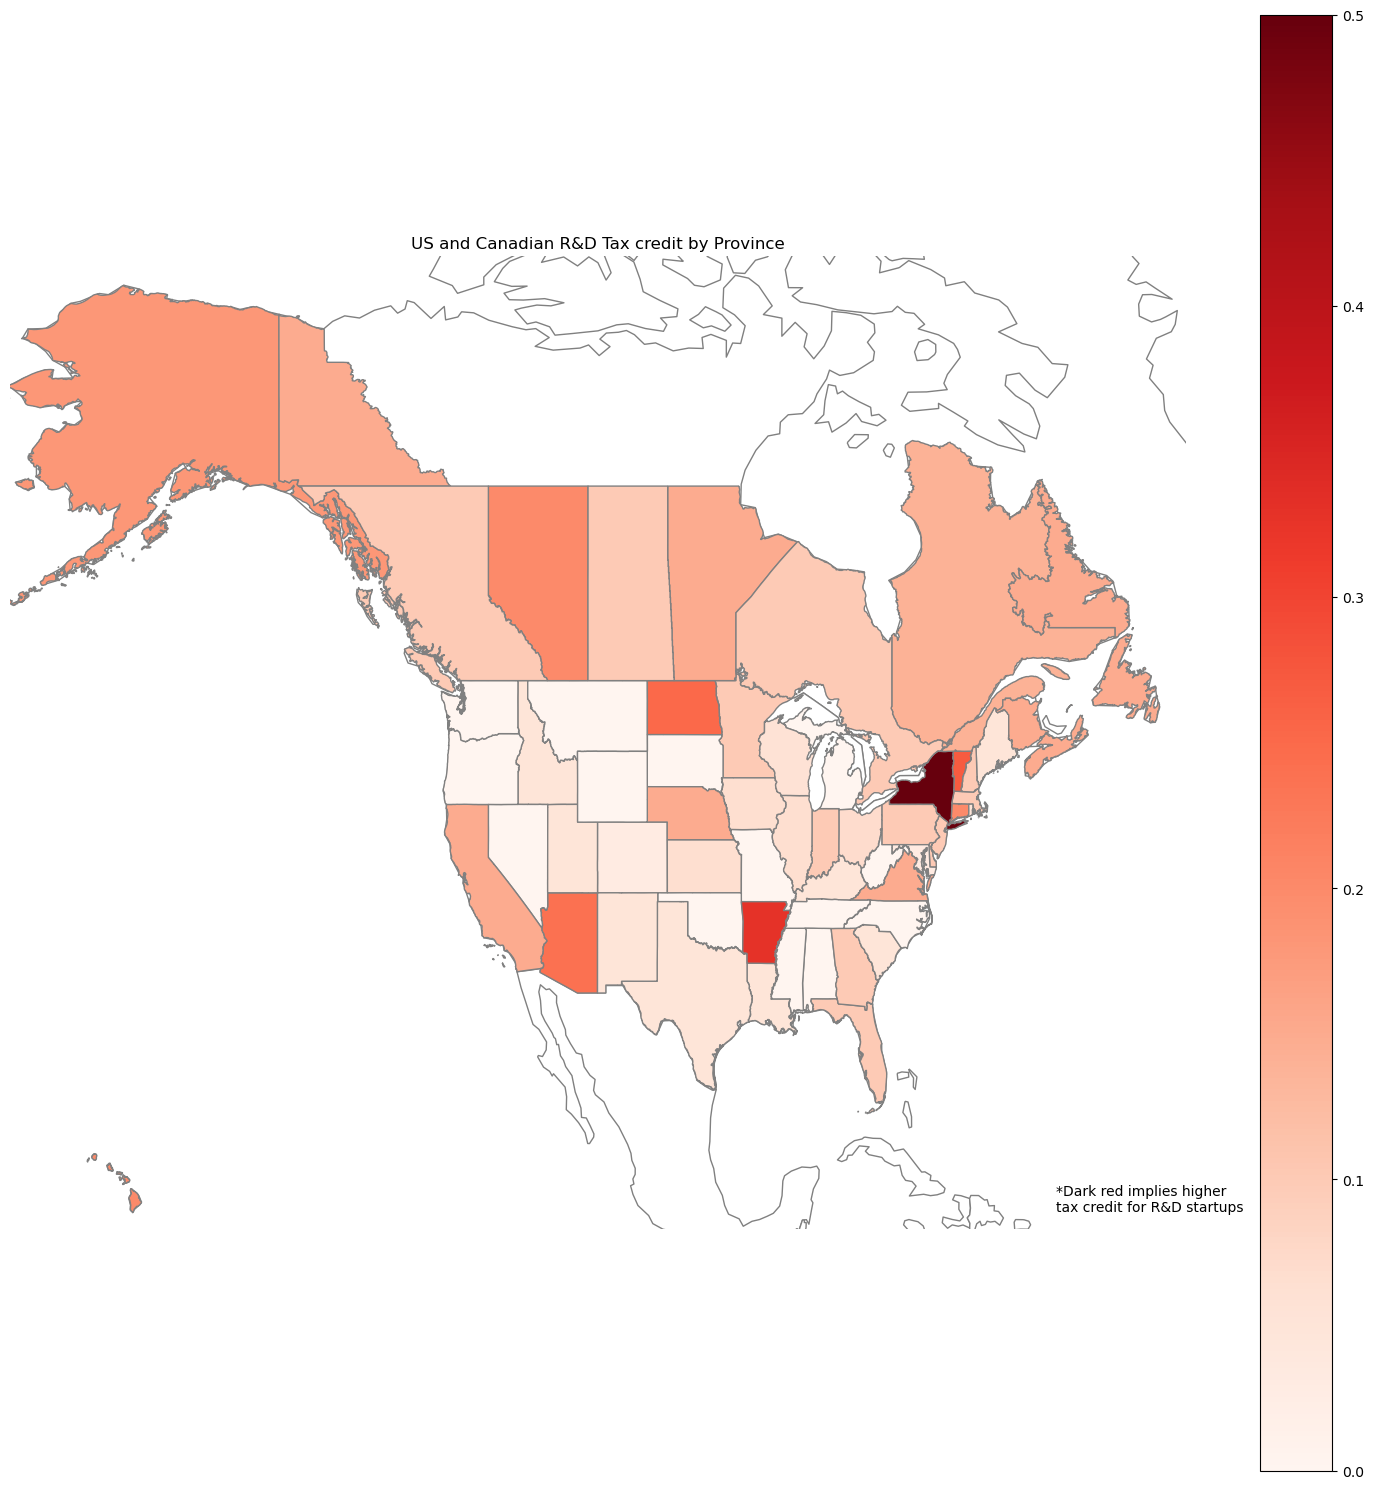

In [149]:
# Create a new column that lists a float value of the tax credit rate
NA_SU["tax_credit_convert"] = NA_SU["tax_credit"].apply(lambda x: float(x.strip("%")) / 100)

# Merging the tax rates to individual states
US_geo_tax = state_df.merge(tax_df, on = "state_code", how = "inner")
US_geo_tax.tax_credit.fillna("0%", inplace = True)
CAN_geo_tax = province_df.merge(tax_df, on = "state_code", how = "inner")
CAN_geo_tax.tax_credit.fillna("0%", inplace = True)

# Create a new column that lists a float value of the tax credit rate
US_geo_tax["tax_credit_convert"] = US_geo_tax["tax_credit"].apply(lambda x: float(x.strip("%")) / 100)
US_geo_tax.drop(axis = 1, columns = "tax_credit", inplace = True)
CAN_geo_tax["tax_credit_convert"] = CAN_geo_tax["tax_credit"].apply(lambda x: float(x.strip("%")) / 100)
CAN_geo_tax.drop(axis = 1, columns = "tax_credit", inplace = True)

# Plotting
fig, gax = plt.subplots(figsize=(15,15))
# plot the region
NA_shape.plot(ax=gax, edgecolor='grey', color = 'white')

US_geo_tax.plot(
    ax=gax, edgecolor='grey', column='tax_credit_convert', legend=True, cmap='Reds', markersize = 20,
    vmin=0, vmax=0.5
)

CAN_geo_tax.plot(
    ax=gax, edgecolor='grey', column='tax_credit_convert', legend=False, cmap='Reds', markersize = 20,
    vmin=0, vmax=0.5
)

gax.set_xlim(-168, -50)
gax.set_ylim(18, 73)
gax.axis('off')
gax.set_title("US and Canadian R&D Tax credit by Province")
gax.text(-63, 19, "*Dark red implies higher\ntax credit for R&D startups", color = "black", alpha = 1)

fig.tight_layout()

Another way to visualize the scraped data in relation to our other variables, we could see if a government tax incentives program has a direct impact on the number of companies in key industries. According to the National Center for Science and Engineering Statistics claims that the highest spending in R&D above all is the Biotechnology industry, with 24.9% of it's R&D funding being funded from 'others', likely from the government and/or private investors. Similarly, according to Statista, software had a slightly higher R&D spending rate than health companies in 2021. It is important to note that 2021 would have still been during the lockdown era (not to mention out of the scope of this project), however software is a key industry that governments will subsidize to allow for greater innovations. With this in mind, the following code are histogram plots that will allow us to see if a higher tax credit plan leads to a greater number of startups in these industries.

Observable from these histographs is that tax credits alone are not responsible for a greater number of companies, even in high R&D spending industries such as biotech and software industries. This is reasonable to assume from the previous map, as Arkansas and North Dakota has a higher tax credit rate relative to the number of startups that are based in these states. It should be noted that New York is the only state in North America which offers a 50% R&D tax credit, and because New York has a high number of startups centered around it, a histogram of any industry in this dataset will have a noticeable spike that New York is solely responsible for. 

For the two visualized industries, software companies see an overall positive impact of greater tax credits. This is most likely due to the fact that software companies is easier to develop than biotech companies. Biotech companies in comparison must meet specific requirements for lab spaces, a manufactutring base to produce material and developed drug, equipment, as well as having a lesser number of skilled workers capable of drug creation. As a result, it may not have as much flexibility afforded by software companies.

Both histograms are plotted between 0% and 15% tax credits, which is unsurprising because the vast majority of 'state' tax credit lies between this range. With the exception of Alberta, every Canadian province falls into these bins, and some US states that are included include popular startup bases like California, Florida, Texas, and Massachusetts.

However, it must be noted that there is chance that the long term impact R&D incentive programs have are not felt in 2014, as it may take longer than expected for companies to take advantage of these local government tax benefits. To understand the true impact of a program like this, it might be useful to think about doing a diff-in-diff model to understand the effect a positive tax 'shock' has on a regions startup market.  

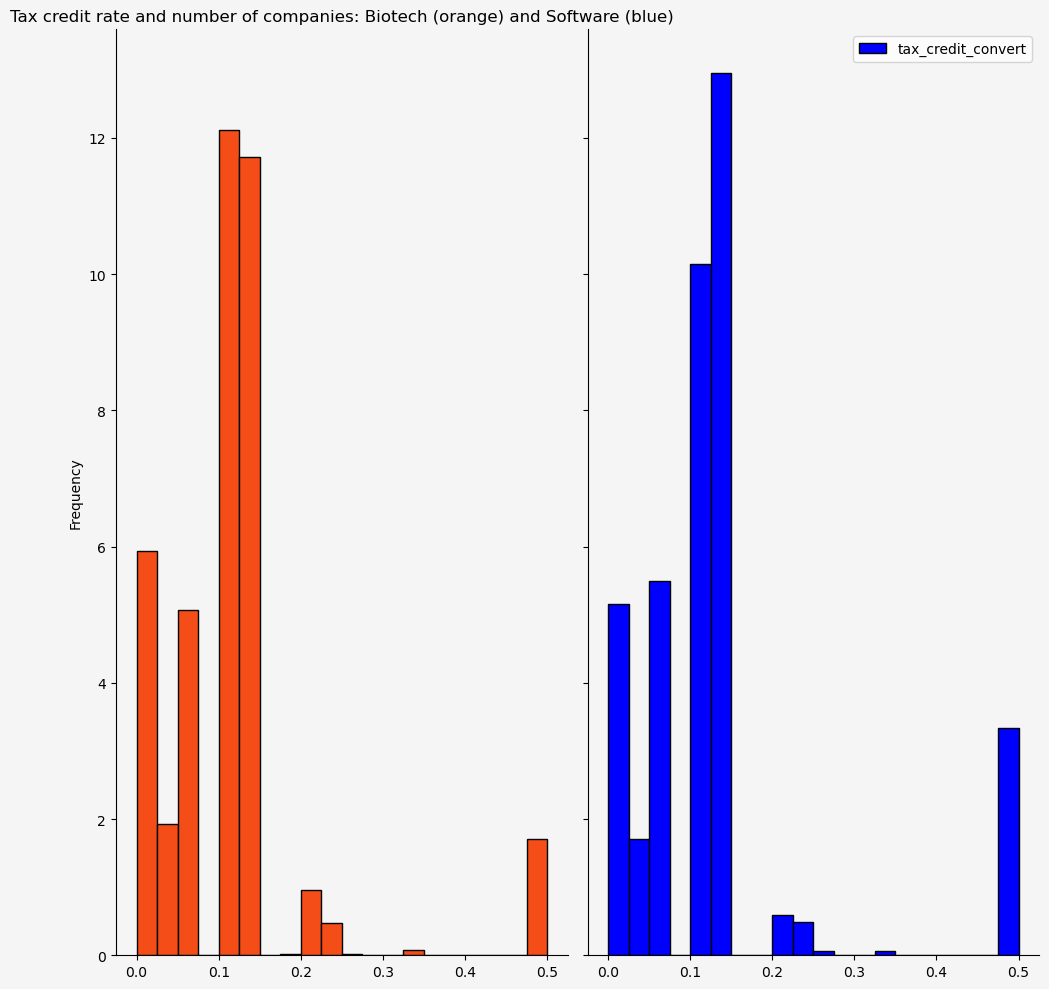

In [150]:
# Create a new column that lists a float value of the tax credit rate
NA_SU["tax_credit_convert"] = NA_SU["tax_credit"].apply(lambda x: float(x.strip("%")) / 100)

# Group by biotech, then drop unneeded columns, then the column into   
biotech_NA = NA_SU.groupby("category_code").get_group("biotech")
biotech_NA.drop(columns = ['category_code', 'status', 'funding_total_usd', "total_acquired_price", "quarter", "real_gdp (billion)", "num_miles", "founded_year", "latitude", "longitude", "Coordinate"], inplace = True)

software_NA = NA_SU.groupby("category_code").get_group("software")
software_NA.drop(columns = ['category_code', 'status', 'funding_total_usd', "total_acquired_price", "quarter", "real_gdp (billion)", "num_miles", "founded_year", "latitude", "longitude", "Coordinate"], inplace = True)

fig, ax = plt.subplots(1, 2, figsize = (10, 10), sharey = True)
biotech_NA.plot(
    kind="hist", y="tax_credit_convert", color=(244/255, 77/255, 24/255), edgecolor = "black",
    bins=20 , legend=False, density=True, ax=ax[0]
)
ax[0].set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_title("Tax credit rate and number of companies: Biotech (orange) and Software (blue)")

software_NA.plot(
    kind="hist", y="tax_credit_convert", color="blue",  edgecolor = "black",
    bins=20, legend=True, density=True, ax=ax[1]
)
ax[1].set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)


fig.tight_layout()

# Final Project

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import jarque_bera
from statsmodels.iolib.summary2 import summary_col
from linearmodels import PanelOLS

from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

## OLS regression

In the current NA_SU dataframe, it is unlikely that the economic relationship between the x variables and the y variables are 'linear'. The fact is, for much of the data present in this dataset, there is reason to believe that it suffers greatly from incomplete information. Immediately noticeable in our dataset is that there are a large number of zeroes that are included for key variables, most notably the valuation of startups (dependent variable) is problematic as there are too many zero values. This is extended further into the total_acquired_price variable, which has many zero entries. The most likely cause of this is that the true value of a startup or the exact price they have been acquired for are likely unknown to the public and the creators of the Kaggle dataset handled missing entries by estimating these values as zero. Furthermore, the num_miles variable can be prone to selection bias, as it is unclear how this data had been collected by the creators of the database. If these variable were scrapped from social media or other websites, it is likely to be biased towards startups that have significant marketing power or a capable social media/HR team that can promote every major or minor accompishment from online.

In economic language, the majority of private companies (especially the lesser known ones that go unnoticed by the general public), the data suffers from information asymmetry. Using the valuation of startups as an example, although there are certainly differences between the average startup when compared to the most profitable 'startups' such as Google, Facebook, and General Motors. 

# FILL UP EST_VALUE WITH STUFF IN FUNDING TOTAL, THAT'LL BE OUR "valuation"

In [152]:
new = NA_SU[NA_SU.valuation > 0]
new

,object_id,name,category_code,status,funding_total_usd,total_acquired_price,quarter,real_gdp (billion),country_code,valuation,...,num_miles,brain_power,network_size,founded_year,latitude,longitude,state_code,Coordinate,tax_credit,tax_credit_convert
3,c:149134,Bahamaslocal.com,search,operating,1200000,0.0,2009Q2,15161.772,BHS,1200000.0,...,1.0,0.00,0.0,2010,0.000000,0.000000,NaN,POINT (0.00000 0.00000),0%,0.00
21,c:81216,Luxury Retreats,travel,operating,5000000,0.0,1999Q1,12410.778,BRB,5000000.0,...,4.0,86.90,1.0,2000,0.000000,0.000000,NaN,POINT (0.00000 0.00000),0%,0.00
22,c:9975,PickUpPal,web,operating,798679,0.0,2007Q3,15671.605,BRB,798679.0,...,1.0,44.35,2.0,2010,0.000000,0.000000,NaN,POINT (0.00000 0.00000),0%,0.00
36,c:164681,abcdexperts,social,operating,147000,0.0,2010Q3,15726.282,CRI,147000.0,...,0.0,0.00,0.0,2010,0.000000,0.000000,NaN,POINT (0.00000 0.00000),0%,0.00
44,c:267396,Slidebean,software,operating,40000,0.0,2013Q2,16464.402,CRI,40000.0,...,0.0,0.00,0.0,2010,0.000000,0.000000,NaN,POINT (0.00000 0.00000),0%,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67822,c:969,Mobivox,mobile,acquired,11000000,0.0,2007Q4,15767.146,CAN,11000000.0,...,0.0,65.50,2.0,2010,45.500277,-73.560084,Quebec,POINT (-73.56008 45.50028),14%,0.14
67823,c:97,EQO,mobile,closed,23500000,0.0,2006Q1,15244.088,CAN,23500000.0,...,6.0,47.15,2.0,2010,49.263588,-123.138565,British Columbia,POINT (-123.13856 49.26359),10%,0.10
67832,c:99853,ChatterBlock,social,operating,500000,0.0,2011Q1,15769.911,CAN,500000.0,...,0.0,0.00,0.0,2010,0.000000,0.000000,British Columbia,POINT (0.00000 0.00000),10%,0.10
67833,c:99853,ChatterBlock,social,operating,500000,0.0,2011Q1,15769.911,CAN,500000.0,...,0.0,0.00,0.0,2010,0.000000,0.000000,Newfoundland and Labrador,POINT (0.00000 0.00000),15%,0.15


In [153]:
new["log_valuation"] = np.log10(new.valuation)
new["log_gdp_billion"] = np.log10(new["real_gdp (billion)"])
new

,object_id,name,category_code,status,funding_total_usd,total_acquired_price,quarter,real_gdp (billion),country_code,valuation,...,network_size,founded_year,latitude,longitude,state_code,Coordinate,tax_credit,tax_credit_convert,log_valuation,log_gdp_billion
3,c:149134,Bahamaslocal.com,search,operating,1200000,0.0,2009Q2,15161.772,BHS,1200000.0,...,0.0,2010,0.000000,0.000000,NaN,POINT (0.00000 0.00000),0%,0.00,6.079181,4.180750
21,c:81216,Luxury Retreats,travel,operating,5000000,0.0,1999Q1,12410.778,BRB,5000000.0,...,1.0,2000,0.000000,0.000000,NaN,POINT (0.00000 0.00000),0%,0.00,6.698970,4.093799
22,c:9975,PickUpPal,web,operating,798679,0.0,2007Q3,15671.605,BRB,798679.0,...,2.0,2010,0.000000,0.000000,NaN,POINT (0.00000 0.00000),0%,0.00,5.902372,4.195113
36,c:164681,abcdexperts,social,operating,147000,0.0,2010Q3,15726.282,CRI,147000.0,...,0.0,2010,0.000000,0.000000,NaN,POINT (0.00000 0.00000),0%,0.00,5.167317,4.196626
44,c:267396,Slidebean,software,operating,40000,0.0,2013Q2,16464.402,CRI,40000.0,...,0.0,2010,0.000000,0.000000,NaN,POINT (0.00000 0.00000),0%,0.00,4.602060,4.216546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67822,c:969,Mobivox,mobile,acquired,11000000,0.0,2007Q4,15767.146,CAN,11000000.0,...,2.0,2010,45.500277,-73.560084,Quebec,POINT (-73.56008 45.50028),14%,0.14,7.041393,4.197753
67823,c:97,EQO,mobile,closed,23500000,0.0,2006Q1,15244.088,CAN,23500000.0,...,2.0,2010,49.263588,-123.138565,British Columbia,POINT (-123.13856 49.26359),10%,0.10,7.371068,4.183101
67832,c:99853,ChatterBlock,social,operating,500000,0.0,2011Q1,15769.911,CAN,500000.0,...,0.0,2010,0.000000,0.000000,British Columbia,POINT (0.00000 0.00000),10%,0.10,5.698970,4.197829
67833,c:99853,ChatterBlock,social,operating,500000,0.0,2011Q1,15769.911,CAN,500000.0,...,0.0,2010,0.000000,0.000000,Newfoundland and Labrador,POINT (0.00000 0.00000),15%,0.15,5.698970,4.197829


In [172]:
new = new[new["network_size"] > 0]

In [182]:
new["log_network_size"] = np.log10(new["network_size"])

In [199]:
new["brain_power_sqr"] = new["brain_power"] ** 2

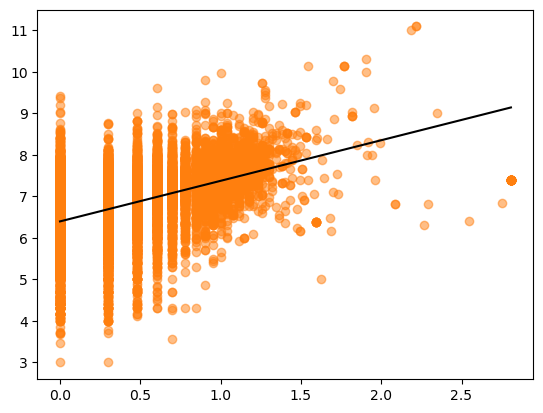

In [237]:
X = new['log_network_size']
y = new['log_valuation']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')
ax.scatter(x = new['log_network_size'], y = new['log_valuation'], alpha=0.5,
        label='observed')

# ax.set_xlim([-0.1, 0.1])
# ax.set_ylim([0,0.5])
# ax.set_xlabel('Average Expropriation Risk 1985-95')
# ax.set_ylabel('Log GDP per capita, PPP, 1995')
# ax.set_title('Figure 2: OLS relationship between expropriation \
#     risk and income')
plt.show()

In [223]:
reg1 = smf.ols(formula='log_valuation ~ num_miles + brain_power', data=new).fit()
reg2 = smf.ols(formula='log_valuation ~ num_miles + brain_power + brain_power_sqr + log_network_size + C(category_code) + C(country_code)', data=new).fit()
reg3 = smf.ols(formula='log_valuation ~ num_miles + brain_power + brain_power_sqr + log_network_size + tax_credit_convert + C(category_code) + C(country_code) + C(founded_year)', data=new).fit()
reg4 = smf.ols(formula=
               'log_valuation ~ num_miles + brain_power + brain_power_sqr + log_network_size + C(category_code) + num_miles * C(category_code) + C(country_code) + tax_credit_convert + C(founded_year) + C(country_code) + C(status)', 
               data=new).fit()

In [230]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1, reg2, reg3, reg4],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4'
                                         ],
                            info_dict=info_dict,
                            regressor_order=['intercept',
                                             "num_miles",
                                             "category_code",
                                             "founded_year",
                                             "tax_credit_convert",
                                             "latitude", 
                                             "founded_year"])

results_table.add_title('Table 1 - OLS Regressions')

print(results_table)

                            Table 1 - OLS Regressions
                                               Model 1 Model 2  Model 3  Model 4 
---------------------------------------------------------------------------------
num_miles                                      0.04*** 0.01***  0.01***  -0.09** 
                                               (0.00)  (0.00)   (0.00)   (0.04)  
tax_credit_convert                                              0.01     0.00    
                                                                (0.05)   (0.05)  
C(category_code)[T.advertising]                        0.06     0.13**   0.08    
                                                       (0.06)   (0.05)   (0.06)  
num_miles:C(category_code)[T.biotech]                                    0.08*   
                                                                         (0.04)  
num_miles:C(category_code)[T.hardware]                                   0.15*** 
                                            

In [227]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])

stargazer.covariate_order(["Intercept", "num_miles", "brain_power", "brain_power_sqr", "log_network_size", "tax_credit_convert"])
stargazer.add_line("Category & Country fixed effect", ["NO", "YES", "YES", "YES"])
stargazer.add_line("Time fixed effect", ["NO", "NO", "YES", "YES"])
stargazer.add_line("Interaction terms", ["NO", "NO", "NO", "YES"])

HTML(stargazer.render_html())

In [235]:
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:          log_valuation   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     68.14
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:56:21   Log-Likelihood:                -11911.
No. Observations:               11519   AIC:                         2.404e+04
Df Residuals:                   11411   BIC:                         2.483e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

## Try just comparing unicorns vs. non unicorns in the 2000's and up

## Notes from TA:

### 1. It's ok that the R^2 is lower. It still can have valuable information that is worth having. For now proceed with the OLS regression results, but maybe use some other regression results as well
### 2. You can make the case that the valuation of a company is unlikely to be 0 and that it is likely to be a way the dataset handles missing values.

## Conclusion

In Project One, the findings were useful as it will help futher the understanding we have on the startups present in North America. From the plots and diagrams, it seemed as though after the great recession there is far more consistency in the data in terms of the funding distribution. In fact, starting from the point of overlap, the distribution of all the startups that follow look almost identical. Most of the periods (including 2011Q1) even seem to share a common log_funding value, which seems to be around 6 (given that log_funding uses base 10, this would be around 1 million USD). The information, combined with the first time series graph, implies that there are a greater number of unseen data that have a logged value of -inf. This would certainly reduce the average funding of all startups, but the ones that are able to secure funding are given a more consistent price. This is not to say there is a standdardized price for all startups, as this is log(funding) and the small integer differences actually represent a far greater difference in total_funding (for example, the 2011Q1 cohort made anywhere between 10000 in funding to 100 million), it seems far more predictable than it may have been in the past.

It was disappointing however to see in project two that many of the clusters would end up looking alike. With the existence of so called industry clusters (i.e. Boston/Cambridge or Silicon valley), there was some expectations that there would be cities specializing in a specific industry. However, with these maps it has become apparent that in terms of location and regional GDP, clusters were highly correlated to both the X and Y variables in a sense. In the future, discussing these issues with the professor may be necessary to see whether this issue would affect a regression test. 

Project three showed different tax credit rates by regions in the US and Canada, which is a proxy for the level of enthusiasm a given local government has to promote their startup economy. New York had by far the highest tax credit rate of 50%, which could potentially be a reason that the state is leading the continent in terms of number of startups. There were also regions with noticeably higher tax credit rates when compared to their neighbors, which shows that these regions are keen on attracting startups and researchers into their economy. Tax credit rates should not be seen as a x-variable itself however, and should be considered a useful control variable for the final project, which would include regression analysis. With tax credit, we can partial out the potential effects tax credit has on the success of startups.

As a whole, the results of project three, as well as prior editions of this project, has shown some evidence for the importance that the location of a startup has on a startups success. Although there are some potential issues that can be presented in a linear regression in the final project (endogeniety, y-variable is not a good estimator, etc), as of now the impact that location has still seems consistent with our results. Although the similarity between industry clusters found in project two may seem disappointing, this is in effect in line with our previous reasoning as these clusters are without fail almost always centered around key regions in North America. For next steps, it will be important to perhaps address the potential issues that the current Y-variable has and find some dataset that includes the valuation of each of these companies. Web scraping for this however may be difficult, as many of the companies in this dataset are unlikely to be included.

## Work cited

BEA. (2022). Gdp by county, metro, and other areas | U. S. Bureau of economic analysis(Bea). Bureau of Economic Analysis. https://www.bea.gov/data/gdp/gdp-county-metro-and-other-areas

Cirtautas, J. (2019). Startup investments. https://www.kaggle.com/datasets/justinas/startup-investments

Crunchbase data. (2019). Access Crunchbase Data. https://data.crunchbase.com/docs

EY. (2021). How countries in the Americas are inviting business and driving growth. https://www.ey.com/en_ca/tax/how-countries-in-the-americas-are-inviting-business-and-driving-growth

Health-related applications account for one-quarter of 2018 u. S. Business r&d; most pharmaceutical r&d focused on biotechnology | nsf—National science foundation. Retrieved March 20, 2023, https://ncses.nsf.gov/pubs/nsf21316

R&D spending by industry worldwide 2021. (2022). Statista. Retrieved May 20, 2023, https://www.statista.com/statistics/270233/percentage-of-global-rundd-spending-by-industry/

R&d tax credits by state. Accessed March 20th, 2023, https://publish.smartsheet.com/df660fc8ecac48e9b354512dc9b837c1

Research & development income tax credit incentive. Default. May 20, 2023, https://www.arkansasedc.com/science-technology/division/commercialization/research-development-tax-credits

U.S. Bureau of Economic Analysis. (1999). Real gross domestic product. FRED, Federal Reserve Bank of St. Louis. https://fred.stlouisfed.org/series/GDPC1




# New stuff
https://github.com/arnaudbenard/university-ranking

Literature Review
https://www.tandfonline.com/doi/epdf/10.1080/13691066.2012.667907?needAccess=true&role=button
    - Valuation of startups: different theories
        - Difficulty to value companies in terms of Present Value of Future cash (pg 152)
            - Most effective is accounting information, but an early stage startup would not be able to provide that
        - Important to determine as it unifies investors and entrepreneurs and allows the fairness in investment
        - Main context: (pg 153)
            - Industry Organization Economics
                - Focuses on the structure of the market in which firms compete
                - Importance of industrial structure
            - Resource Based View
                - Conceptualizes the firm as a bundle of valuable resources
                - Interal resources in predicting firm performance 
            - Network Theory
                - How does the firms' 'network' affect its strategies
                - Basically views the value of a firm as being affected most by external factors
        - Basically, if there is little 'output' of a company that can be valued, then it will be valued by it's 'input'
    - Industry Organization and value
        - Product Differentiation (Caves (1972))
            - Differentiating your product from others is the most important for firm performance
        - Comanor and Wilson (1967)
            - Higher advertising implies higher rates of return
        - Industry Growth
            - Hall and Weiss (1967) find that industry growth rate is positively correlated with industry profitability
            - In practice, venture capitalists are very attracted to this factor
            - *Gives some creedence to controlling for industry*
        - Entrepreneurial resources and startup evaluation
            - A great number of literature exists on the value of management and leadership in a company's performance as well as survival
        - Entrepreneur
            - There is also a good bit of literature on the value of the main entrepreneur and his reputation itself
            - Solo vs. Founding team
    - External ties and startup valuation
        - Stuart, Hoang, and Hybels (1990) an entrepreneurs network plays an important role in searching for opportunities
            - Argues further that if a emergining startup gains some credibility, it boosts everybody else up in their network
        - Network Size
            - Gulati (2005) argues network size is an important determinant
    - Suport for almost all hypotheses


https://reader.elsevier.com/reader/sd/pii/S0165410101000180?token=C9062932CCD261C2D250ACAA9F08A08808B9D58A2993A325F10F086DBA7BE1595D8DDA3D182892D3E50300D522E37079&originRegion=us-east-1&originCreation=20230412181829
    - Discusses the importance of disclosure and the issues that arise from conflicting interests between savers and investors
        - Argues the primary organization that leads to publicly available information are auditors and accounting regulators
            - Regulation of information does not mean they allow full disclosure to the public
            - "Factors include the ability to write, monitor, and enforce optimal contracts, proprietary costs that might make full disclosure costly for investors, regulatory imperfections, and potential incentive problems for intermediaries themselves." (pg 409)
        - Lemon problem
            - Potential prisonner's dilemma issue?
            - Akerlof (1970) argues that this could potentially breakdown the functioning of the capital market
            - Potentially leads to the overvaluing of 'bad' ideas and undervaluing of good by averaging both (pg 408)
        - Solutions to the lemons problem
            - Krepps (1990) Optimal Contracts incentivize full disclosure
    - Conflicting interests between savers and entrepreneurs
        - Savers that invest in a business do not intend to play a role in management; that is the job of the entrepreneur
        - Jensen and Meckling (1976) argue entrepreneurs therefore have an incentive to expropriate the savers funds
        - Smith and Warner (1979) argue that if savers instead by a debt stake in the startup, entrepreneurs could take riskier investment choices that potentially further debt for higher payouts
            - Although if there is a good payout, both parties benefit, however much of the responsibility is borne by the debt holder and more of the payout is given to the entrepreneur
        - Again, optimal contracts help with this
        - *Focus less on optimal contracts, because this is mostly on the issues that come from information asymmetry between the public and entrepreneurs*
    - Background
        - In the US, companies accessing the capital markets are required to follow disclosure rules outlined by the Securities and Exchange Commission
            - Essentially for publicly traded company, outside investors can free ride on the publicly available information
             Dechow et al. (1996) and Beneish (1999) find that US companies
            - Dechow et al. (1996) and Beneish (1999) argues companies face a significant stock price penalty if the SEC decides to pursue them for violating accounting standards
        - Discussed by Leftwich(1980), Watts and Zimmerman (1986), and Beaver (1998), proposes that disclosure regulation is motivated by concerns that the welfare of less financially literate investors can be jeopardized
            - These authors argue that regulatory boards ask for disclosure to redestribute wealth rather than improving the economy
        - Potentially compromised investors
            - Posner (1974) argues that regulators tend to become captured by those they regulate
    - Auditors
        -  Leftwich(1983) finds that banks require firms to present audited financial information, even for private companies. This implies that capital providers regard auditors as enhancing credibility.
        - At the time, no research was done to determine if an auditor adds significant credibility of reported financial statements
            - Dodd et al. (1984, 1986); Dopuch et al. (1986, 1987) shows the stock market reaction to audit qualifications show that qualified opinions do not provide new information to investors, in part because they can be anticipated
                - Evidence suggests that audit qualifications at best confirm information already available to investors
    - Intermediaries
        - Financial analysts (I guess this is what this research would be sort of classified as) collect information from public and private sources to advise investors
        - Evidence from academic sources that corroborate that analysts add value in the capital market
             - Earnings forecast more accurate than time-series models of earnings, presumably because their information is more relevant and up-to date
             - Brown et al. (1985) argue that early evidence on bias indicated that analyst earnings forecasts tended to be optimistic, and that their recommendations were almost exclusively for buys
        - Bhushan (1989a, b) and Lang and Lundholm (1993) argue that voluntary disclosure lowers the cost of information acquisition for analysts and hence increases their supply
        - Studies of the value provided by bond-rating agencies such as Holthausen and Leftwich (1986); Hand et al. (1992) conclude that rating downgrades provide new information to investors, but that upgrades are already reflected in stock and bond prices when they are announced

**This is literally one large literature review. Just skim the less important stuff and use this source to find sources**

https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test
- Test for normality 